# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

As per [the article describing the business case](http://localhost:8888/notebooks/module17/module_17_starter/CRISP-DM-BANK.pdf):
> The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts. D

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [142]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Observing dataframe info shows that there are no missing values from the dataset.

There are 11 features classified as object that would need to be encoded if they are to be included as part of the model training. Of these, one of them, "y" (our target variable) doesn't necessarily need to be encoded depending on the type of model used. Still, it would be better to encode it to a 0/1 value to avoid any unexpected behavior.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Based on the [included article](http://localhost:8888/notebooks/module17/module_17_starter/CRISP-DM-BANK.pdf), the business objective of this task is to build a model to explain the success of a contact as part of a direct marketing campaign, and then, as per the abstract of the article:
> use that model to determine the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [6]:
list_str_obj_cols = df.select_dtypes(include=['object'])

for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [7]:
bank_df = df.iloc[:, :7]
bank_df.head()

age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes

In [8]:
transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include='category')),
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_bank = bank_df
y_bank = np.where(df['y'] == 'yes', 1, 0)

In [11]:
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, stratify=y_bank)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

In [13]:
base_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DummyClassifier(random_state=42))
])

base_pipeline.fit(X_bank_train, y_bank_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1211e97d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12073b550>)])),
                ('clf', DummyClassifier(random_state=42))])

In [14]:
base_pipeline.score(X_bank_train, y_bank_train)

0.8873444613050075

In [15]:
base_pipeline.score(X_bank_test, y_bank_test)

0.8873512988589464

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
import time
from sklearn.linear_model import LogisticRegression

In [17]:
lr_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

lr_fit_start = time.time()
lr_pipeline.fit(X_bank_train, y_bank_train)
lr_fit_end = time.time()

lr_fit_time = (lr_fit_end - lr_fit_start)

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
lr_pipeline.score(X_bank_train, y_bank_train)

0.8873444613050075

In [19]:
lr_pipeline.score(X_bank_test, y_bank_test)

0.8873512988589464

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [21]:
models = ['LR', 'KNN', 'DT', 'SVM']
train_times = []
train_accuracy = []
test_accuracy = []

In [22]:
# Logistic Regression
train_times.append(lr_fit_time)
train_accuracy.append(lr_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(lr_pipeline.score(X_bank_test, y_bank_test))

In [23]:
# KNN
knn_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', KNeighborsClassifier())
])

knn_fit_start = time.time()
knn_pipeline.fit(X_bank_train, y_bank_train)
knn_fit_end = time.time()

knn_fit_time = (knn_fit_end - knn_fit_start)

In [24]:
train_times.append(knn_fit_time)
train_accuracy.append(knn_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(knn_pipeline.score(X_bank_test, y_bank_test))

In [25]:
# Decision Tree
dt_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_fit_start = time.time()
dt_pipeline.fit(X_bank_train, y_bank_train)
dt_fit_end = time.time()

dt_fit_time = (dt_fit_end - dt_fit_start)

In [26]:
train_times.append(dt_fit_time)
train_accuracy.append(dt_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(dt_pipeline.score(X_bank_test, y_bank_test))

In [36]:
# SVM
svm_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', SVC(random_state=42))
])

svm_fit_start = time.time()
svm_pipeline.fit(X_bank_train, y_bank_train)
svm_fit_end = time.time()

svm_fit_time = (svm_fit_end - svm_fit_start)

In [55]:
train_times.append(svm_fit_time)
train_accuracy.append(svm_pipeline.score(X_bank_train, y_bank_train))
test_accuracy.append(svm_pipeline.score(X_bank_test, y_bank_test))

In [60]:
model_comparison_df = pd.DataFrame({
    'Model': models,
    'Train Time': train_times,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

model_comparison_df.set_index('Model')

Train Time  Train Accuracy  Test Accuracy
Model                                           
LR       0.337442        0.887344       0.887351
KNN      0.077988        0.889924       0.875212
DT       0.592714        0.916662       0.862831
SVM     53.265338        0.888134       0.887958

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Engineering
Starting from the original dataset, we can selectively choose features to use as part of model training that seem like they would relevant to the outcome.

As indicated in the initial dataset info, **"duration"** is highly correlated with the outcome of the campaign and as such should not be included as part of the model.

We will examine other features to determine the merit of including them as part of model training.

In [140]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

One other feature that could benefit from adjustment is **"pdays"**. While scaling would account for this to a certain degree, defining "no previous contact" as 999 heavily skews results related to this subset of samples. As such, these values will be changed to -1, which has the added benefit of making overall results related to samples with these values as more interpretable.

In [30]:
no_duration_df = df.drop('duration', axis=1)
no_duration_df.loc[no_duration_df['pdays'] == 999, 'pdays'] = -1

In [27]:
import seaborn as sns

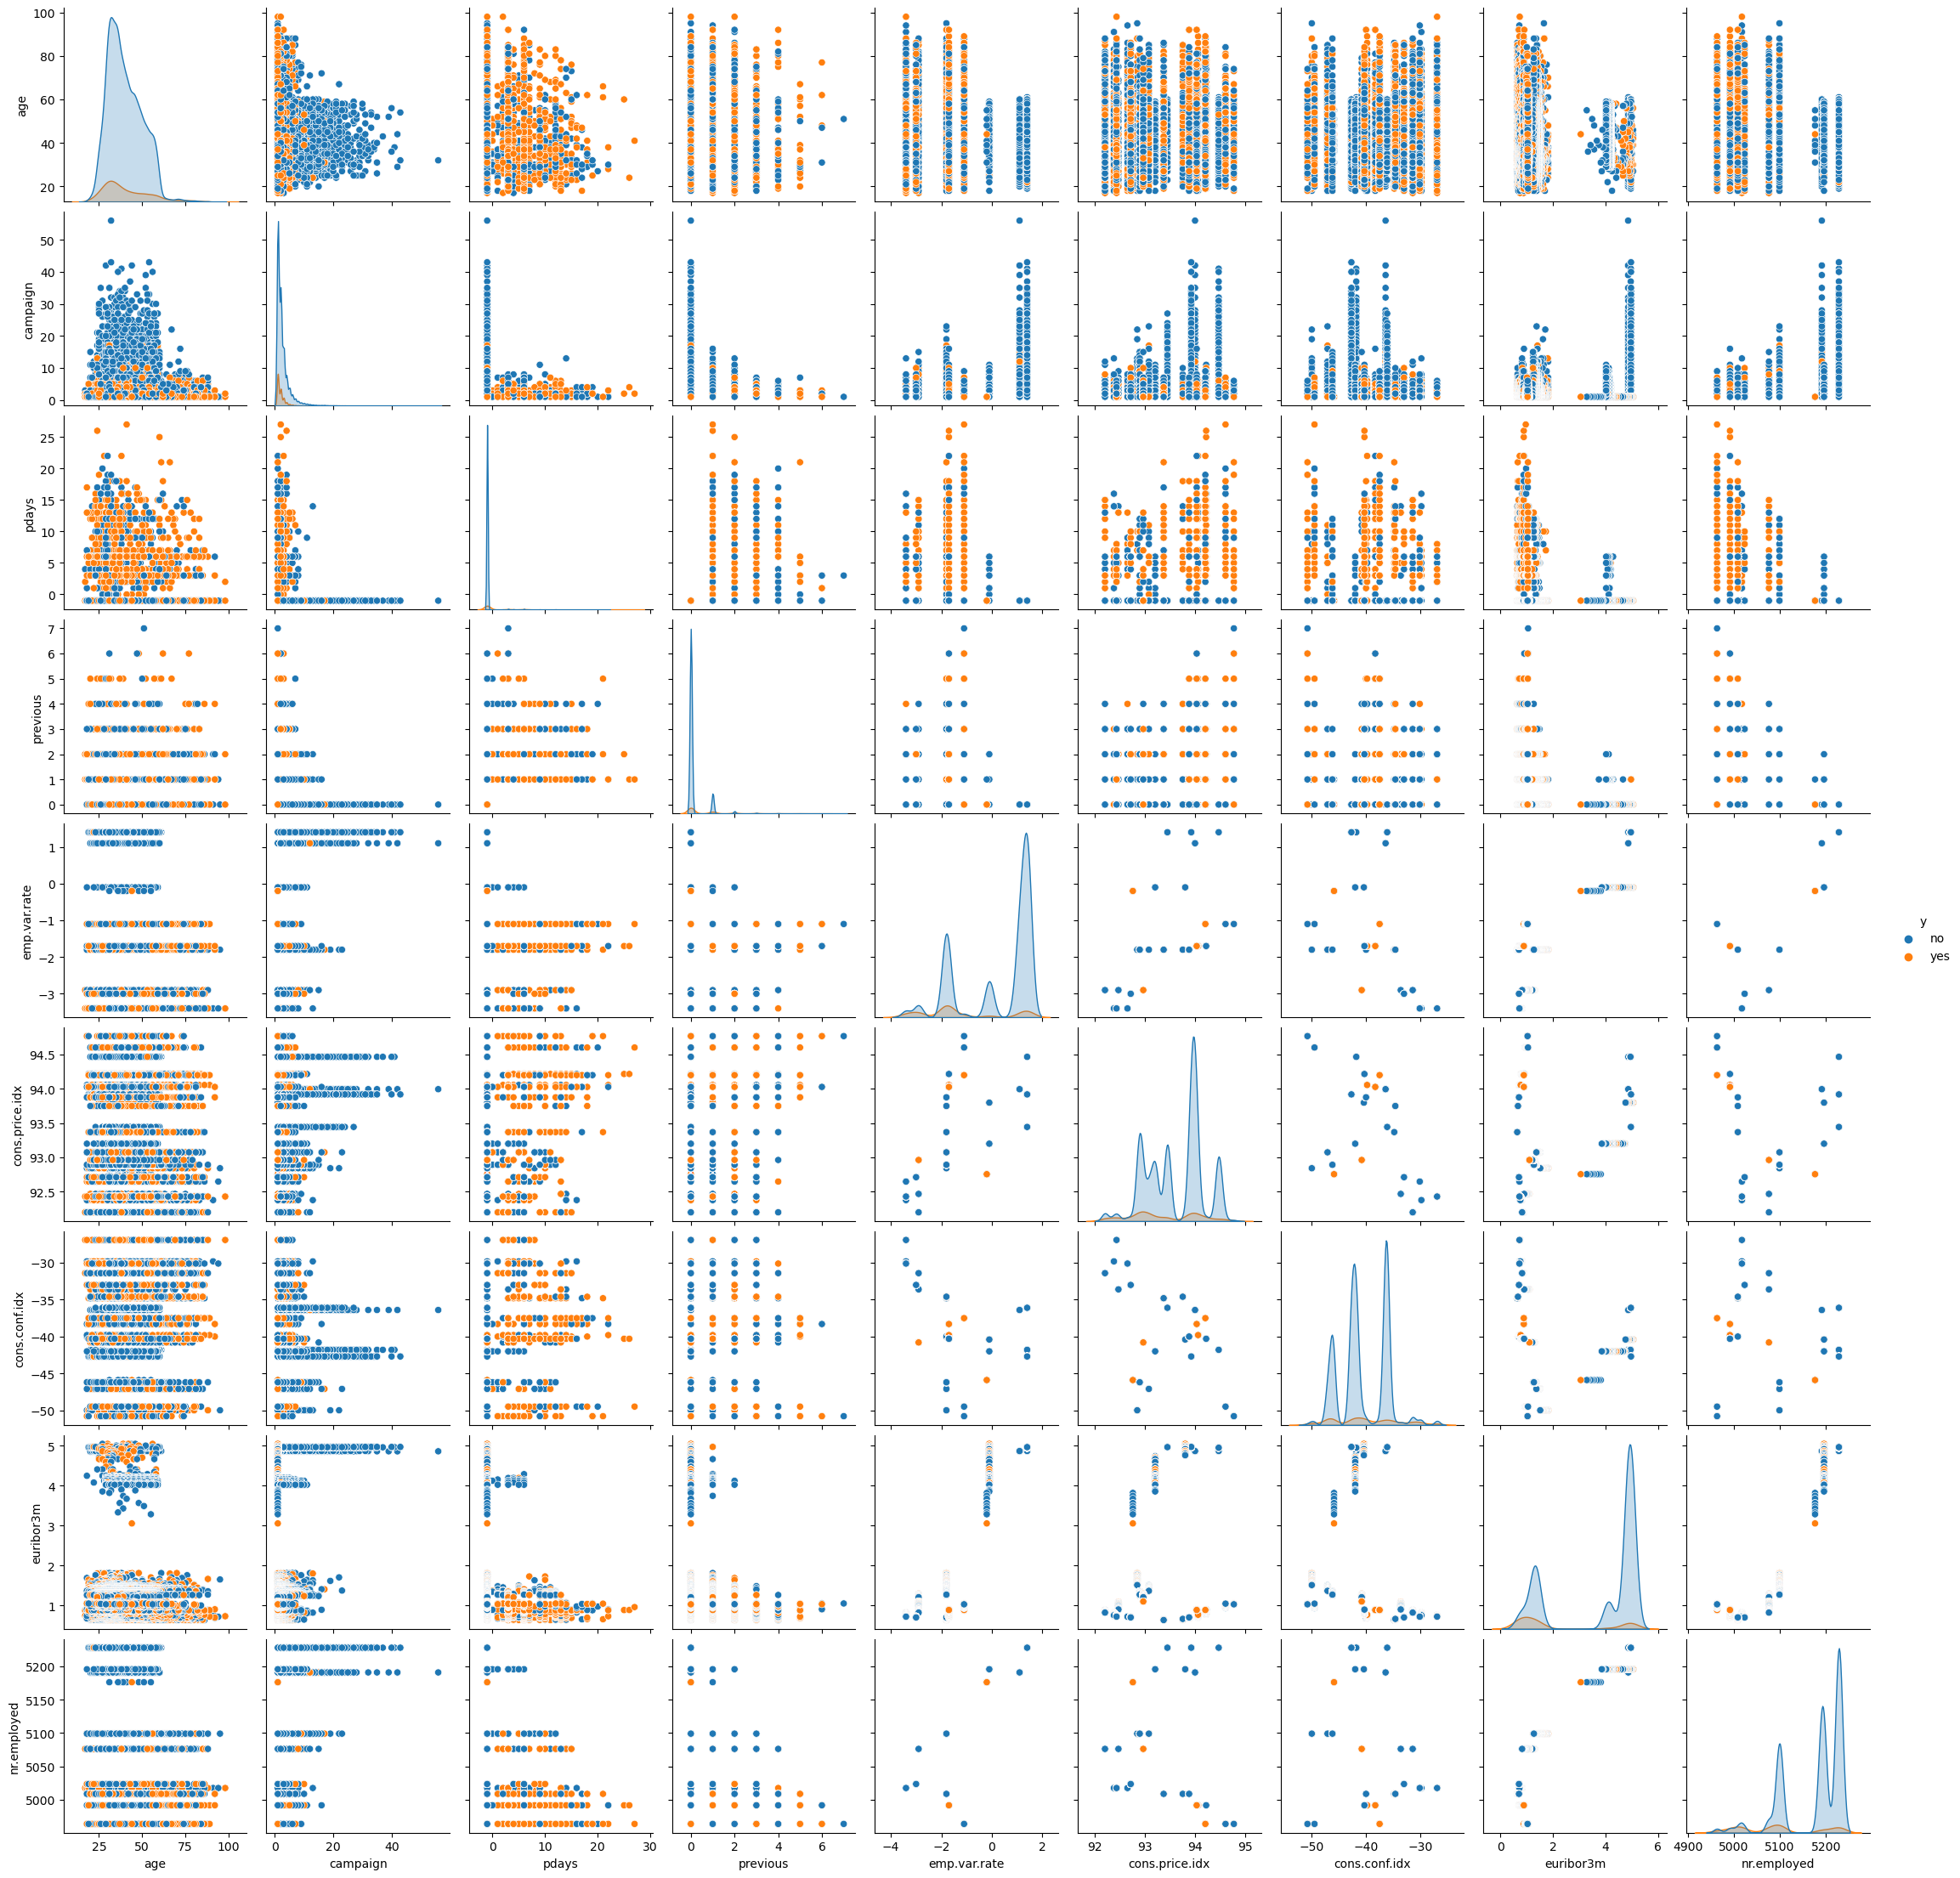

In [73]:
sns.pairplot(no_duration_df, hue='y')

### Methods for Model Performance Comparison

In [28]:
def compare_models(models, X, y):
    train_times = []
    train_accuracy = []
    test_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    for model in models:
        model, train_times, train_accuracy, test_accuracy = fit_model(
            model, 
            train_times, 
            train_accuracy, 
            test_accuracy, 
            X_train, 
            X_test, 
            y_train, 
            y_test
        )
        
        if type(model) == GridSearchCV:
            print(f'Best params for this model: {model.best_params_}')
    
    return display_models(train_times, train_accuracy, test_accuracy)

def fit_model(model, train_times, train_accuracy, test_accuracy, X_train, X_test, y_train, y_test):
    fit_start = time.time()
    model.fit(X_train, y_train)
    fit_end = time.time()

    fit_time = (fit_end - fit_start)
    
    train_times.append(fit_time)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    
    return model, train_times, train_accuracy, test_accuracy

def display_models(train_times, train_accuracy, test_accuracy):
    model_comparison_df = pd.DataFrame({
        'Model': ['LR', 'KNN', 'DT', 'SVM'],
        'Train Time': train_times,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

    return model_comparison_df.set_index('Model')

### Comparison of Models with Full Features

In [138]:
X_full_features = no_duration_df.drop('y', axis=1)
y_full_features = np.where(no_duration_df['y'] == 'yes', 1, 0)

In [139]:
full_feature_models = [lr_pipeline, knn_pipeline, dt_pipeline, svm_pipeline]

compare_models(full_feature_models, X_full_features, y_full_features)

Train Time  Train Accuracy  Test Accuracy
Model                                           
LR       1.162486        0.899514       0.900704
KNN      0.201685        0.911836       0.897062
DT       0.627812        0.887344       0.887351
SVM    167.369090        0.905827       0.903253

### Balance Samples
Currently only a small percentage of samples return a positive outcome (subscribed). For certain models this can skew the performance. As such we will perform oversampling in an effort to improve model performance.

In [32]:
from imblearn.over_sampling import SMOTENC

In [68]:
oversample = SMOTENC(categorical_features='auto', random_state=42)

X_balanced, y_balanced = oversample.fit_resample(X_full_features, y_full_features)

In [93]:
balanced_feature_models = [lr_pipeline, knn_pipeline, dt_pipeline, svm_pipeline]

compare_models(balanced_feature_models, X_balanced, y_balanced)

Train Time  Train Accuracy  Test Accuracy
Model                                           
LR       2.228478        0.771513       0.774077
KNN      0.232597        0.899018       0.860944
DT       2.842430        0.996118       0.890766
SVM    271.589349        0.827827       0.820588

### Hyperparameter Optimization
As a further step, we can proceed to hyperparameter optimization to improve model performance. Given that changing hyperparameters (not to mention introducing cross-fold optimization) can dramatically impact training time the train time numbers will be less reliable as a general basis of performance analysis. However, we should still expect the same general trends comparing across different model types.

#### Change Performance Metric
As part of the hyperparameter optimization process, we will change scoring for the best model from the default value of **"accuracy"** to **"recall"**. In regards to the business problem trying to be solved, we benefit more from capturing as many true positives as possible. Its better to invest more marketing time into making more calls overall if the end result is more subscriptions.

In [62]:
from sklearn.model_selection import GridSearchCV

In [65]:
lr_grid_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42))
])

lr_params = {
    'clf__C': [0.01, 0.1, 1]
}

lr_grid = GridSearchCV(
    estimator=lr_grid_pipeline,
    param_grid=lr_params,
    scoring='recall',
    n_jobs = -1
)

In [66]:
knn_grid_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', KNeighborsClassifier(n_jobs=-1))
])

knn_params = {
    'clf__n_neighbors': range(10, 20, 2),
    'clf__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(
    estimator=knn_grid_pipeline,
    param_grid=knn_params,
    scoring='recall',
    n_jobs = -1
)

In [63]:
dt_grid_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': range(10, 30, 2),
    'clf__ccp_alpha': np.arange(0.0000, 0.0025, 0.0005)
}

dt_grid = GridSearchCV(
    estimator=dt_grid_pipeline,
    param_grid=dt_params,
    scoring='recall',
    n_jobs = -1
)

In [67]:
svm_grid_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', SVC(cache_size=1000, random_state=42))
])

svm_params = {
    'clf__C': [0.01, 0.1, 1, 10, 100, 1000]
}

svm_grid = GridSearchCV(
    estimator=svm_grid_pipeline,
    param_grid=svm_params,
    scoring='recall',
    n_jobs = -1
)

In [70]:
# NOTE: GridSearch takes a substantially long time to optimize.
grid_models = [lr_grid, knn_grid, dt_grid, svm_grid]

compare_models(grid_models, X_balanced, y_balanced)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           62     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.

 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.


 0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00

 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.00

      1.7988D+02  2.7088D+02 -1.1471D+02  1.4158D+02  1.0421D+02  4.5575D+01
      5.5699D+02  3.5618D+01  2.1843D+01  1.1492D+01  6.8728D+01  1.5390D+02
      2.3216D+02  7.0015D+01  2.5150D+00  2.4034D+02 -2.8462D+02  1.4291D+02
     -1.3046D+02  7.5579D+02  6.1889D-01  3.6024D+02  1.4896D+02  1.1675D+02
     -2.6516D+02  1.5671D+02  7.3439D+02  1.0346D+03 -9.0012D+01  1.8107D+02
     -2.9833D+01 -1.7725D+02 -6.3461D+00 -2.3480D+02  8.6387D+02  2.5715D+02
     -1.1078D+02 -2.7121D+01  2.1723D+02  2.5520D+02  4.4958D+01  1.4225D+02
     -3.3694D+01  6.0488D+02  3.1413D+02 -2.9307D+02 -1.8026D+01  3.6709D+02
     -6.1723D+02  2.4975D+02  1.2100D+03  2.1901D+02  2.0877D+02  1.2666D+03
      1.3552D+03  6.3158D+02


ITERATION     5

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.29316152749668972     

At iterate    2    f=  2.60588D+04    |proj g|=  2.64929D+03

 X =  8.1233D-02 -3.525

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


-3.2030D-01 -2.6872D-01 -3.5141D-01  4.9292D-01
     -4.0601D-01 -2.4796D-01  2.7600D-01  8.0166D-02 -2.4980D-01 -9.5860D-02
     -8.1729D-01  2.8178D-01  1.5600D-01 -2.8734D-02 -9.4569D-02 -2.6148D-01
     -2.4090D-01  1.8560D-01 -6.5650D-03 -1.7319D-01  4.6078D-01 -2.7791D-01
      3.0664D-01 -7.1352D-01 -1.3555D-03 -1.5024D-01 -2.8149D-01  2.3497D-02
      6.6167D-01 -3.0356D-01 -7.6635D-01 -8.4423D-01 -1.1475D-01 -2.1472D-01
      3.9542D-02  7.6011D-02  8.7628D-02  4.5367D-01 -4.2931D-01 -3.8521D-01
      1.4220D-01 -6.3307D-02 -1.0316D-01 -2.0308D-01 -4.2782D-02 -1.1482D-01
      5.5599D-02 -7.9857D-01 -6.0558D-02  4.5089D-01  8.3299D-02 -2.8395D-01
      2.7379D-01 -1.9559D-01 -4.1339D-01  3.6645D-01  1.6771D-01 -1.6856D-01
     -4.0785D-01 -4.8557D-01

 G = -2.4520D+01  4.5879D+01  1.8386D+01  1.6727D+01 -1.5294D+01 -3.6667D+01
      3.6677D+01 -3.6389D+01 -5.6796D+01 -6.6021D+00  1.9288D+01  1.2708D+01
     -6.5272D+01  1.5033D+01  1.8296D+01  5.3406D+00  1.7724D+01  1.9394D+0

 X =  2.5109D-01  4.6586D-01 -4.2658D-01 -2.8479D-01 -3.7880D-01  5.8579D-01
 G = -3.7036D+02 -5.9526D+01  1.8647D+02  1.0988D+02  2.2720D+02 -1.7678D+02
     -4.4841D-01 -1.9728D-01  3.8627D-01  1.1129D-01 -3.1556D-01 -1.1835D-01
      1.7862D+02  3.0696D+02 -3.7534D+01  1.2864D+02  1.2313D+02  4.0623D+01
     -7.8203D-01  3.0987D-01  1.4668D-01 -4.3993D-02 -1.3582D-01 -3.2363D-01
      6.0869D+02 -1.6502D+02  1.9682D+02  1.6841D+01  1.0889D+02  1.7386D+02
     -2.4294D-01  2.1566D-01 -1.1640D-02 -1.0392D-01  5.1380D-01 -2.8099D-01
      2.7511D+02  8.8228D+01  3.6579D+00  2.7604D+02 -4.2221D+02  1.5375D+02
      2.7574D-01 -6.4216D-01 -3.0578D-03 -1.1328D-01 -3.1531D-01  5.9111D-02
      4.9138D+00  6.5147D+02  9.4265D-01  2.9180D+02  1.5233D+02  2.1320D+02
      5.8788D-01 -3.3629D-01 -6.2107D-01 -8.8942D-01 -7.1852D-02 -2.5885D-01
     -3.7429D+02  1.5902D+02  8.7260D+02  4.3979D+02  1.6507D+02 -4.3777D+01
      6.2356D-02  5.9957D-02  1.0413D-01  5.5877D-01 -4.1564D-01 -3.8467D-01

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.


8690D-01  1.4633D+02  9.4316D+01  3.1780D+02


ITERATION    19
      2.3526D+02  1.0040D+02  2.2278D+02  2.3306D+02  1.9907D+02  1.0982D+02
     -5.1608D+00  1.9363D+02  1.0421D+02 -9.6889D+01 -1.5828D+02  1.5303D+02
     -1.8712D+01  7.7725D+01  2.7814D+01  1.2245D+02  1.7845D+02  1.3769D+02

----------------SUBSM entered-----------------

      9.2037D+01  8.7475D+01  5.6762D+02 -9.6657D+01 -6.8041D+01 -3.1670D+02
     -2.4536D+01 -4.0878D+02  5.2244D+01  8.0249D+01 -1.5099D+02 -8.2969D+01
     -7.2815D+01  5.6073D+02



----------------exit SUBSM --------------------
     -6.8259D-01  2.9295D-01  1.1959D-01 -5.2596D-02 -1.0883D-01 -3.0560D-01
ITERATION     7

 G =  3.9102D+02 -2.6455D+02  1.4242D+02  9.7707D+01  1.9087D+02 -1.1946D+02
     -1.8837D-01  1.8776D-01 -1.1396D-02 -8.5475D-02  4.9886D-01 -3.0960D-01
      1.4710D+02  7.8059D+01 -7.4262D+01  2.6016D+01  1.0446D+02  3.3443D+01

      3.2920D+02  1.9601D+02  2.1671D+02  1.0917D+01  5.6165D+01  8.4276D+01
----------------SUBS

     -1.2105D+02 -6.1560D+01  3.5573D-01 -8.7225D+01  2.3368D+01 -1.1840D+02
      2.7716D-01 -6.1562D-01 -1.8894D-03 -7.8629D-02 -3.4444D-01  8.2712D-02
     -1.4717D+01  2.8507D+01 -1.9604D+02  6.0264D+00 -8.0240D+01 -2.7367D+00
      6.3862D-01 -3.8534D-01 -5.9364D-01 -9.5185D-01 -2.3282D-02 -2.4883D-01
     -1.1933D+01  4.2282D+01 -3.7044D+01 -9.0977D+01  4.9329D+01 -3.2239D+01
      3.1828D-02  6.8411D-02  1.0733D-01  6.2832D-01 -4.3131D-01 -3.9445D-01
     -2.6975D+01  8.2802D+00  1.2469D+01 -5.3344D+01 -8.6753D+01 -6.0365D+01
      1.4632D-01 -2.2471D-01 -8.3800D-02 -1.9604D-01 -3.1448D-02 -9.5041D-02
      5.7394D+00  5.2840D+01 -1.5873D+02 -7.6361D+01  1.7762D+02  1.1429D+02
      6.5975D-02 -8.7330D-01 -6.5655D-02  5.9860D-01  5.2980D-02 -2.6540D-01
      6.7487D+01  4.2522D+01  2.5976D+02  1.5882D+02 -2.2653D+02  8.1281D+01
      2.4609D-01 -1.7024D-01 -6.4399D-01  4.5130D-01  1.8487D-01 -3.8050D-02
      9.8005D+01 -1.7719D+02
     -3.2830D-01 -5.7437D-01

 G = -3.6710D+01 

At iterate   16    f=  2.21796D+04    |proj g|=  7.26821D+01

 X =  2.6805D-01  4.9255D-01 -4.4465D-01 -2.8735D-01 -3.1219D-01  6.1221D-01
 X =  2.7778D-01  6.6064D-01 -5.5850D-01 -4.8326D-01 -4.5946D-01  8.8137D-01
     -5.0016D-01 -1.3678D-01  5.0969D-01  1.1472D-01 -3.5894D-01 -1.9286D-01
     -7.7895D-01 -1.6071D-01  6.3666D-01  1.8705D-01 -4.7625D-01 -2.0284D-01
     -6.7603D-01  3.6980D-01  1.5481D-01 -8.4292D-02 -1.0021D-01 -2.8821D-01
     -9.3573D-01  3.6076D-01  1.6667D-01 -6.8172D-02 -1.9103D-01 -4.5346D-01


ITERATION    16


     -2.6079D-01  2.8991D-01 -1.4954D-02 -4.6080D-02  6.4566D-01 -4.4573D-01
      1.0477D+01 -3.6322D+00 -2.7906D+00 -7.6718D+00  1.7521D+01  7.2051D+00
     -6.8166D-01 -1.5479D+01 -3.7910D+00  5.6297D+00 -2.6656D+00 -6.8141D-01
      1.2699D+00 -4.2730D+00 -3.8435D+00  6.3153D+00  1.6616D+01  1.2414D+00
      2.5145D-01 -7.2473D-01 -3.1962D-03 -7.6044D-02 -4.8476D-01  8.4331D-02
     -1.6275D+01  1.3020D+01 -1.3890D+01  4.9247D+00 -6.1543D+01 -5.175

     -3.8797D-01  1.6650D-01  1.8312D-02 -1.0350D-02 -3.9627D-02 -1.1436D-01
     -1.6725D-01  1.3295D-02 -2.1792D-03 -1.2881D-01  3.2429D-01 -9.8862D-02
      2.7010D-01 -4.8292D-01 -6.9046D-04 -1.3846D-01 -1.1093D-01  3.5882D-02
      4.3183D-01 -1.1589D-01 -5.2945D-01 -5.6592D-01  1.0123D-02 -4.2210D-02
      2.3190D-02  2.6222D-01  7.1932D-02  1.5983D-01 -6.5797D-01 -1.5653D-01
      1.0338D-01  1.2516D-02 -1.2737D-01 -1.2979D-01  3.7547D-04 -5.3177D-02
      9.6450D-02 -5.1740D-01  5.5336D-02  2.4855D-01  1.5132D-02 -3.2246D-01
      4.8886D-01 -3.5414D-01 -2.9440D-01  3.6889D-01  1.2542D-01 -3.2708D-01
     -5.4401D-01 -2.1811D-01

 G =  3.0129D+02 -2.6637D+02  1.2201D+02  8.5412D+01  1.5363D+02 -1.0587D+02
 LINE SEARCH           0  times; norm of step =   0.14428344442112745     
      1.4346D+02  4.8566D+01 -6.9815D+01 -1.4972D+01  9.3314D+01  2.7879D+01
      2.7402D+02  8.8516D+01  1.4577D+02  1.0237D+01  4.0950D+01  7.0378D+01
      2.5254D+01 -3.7463D+01  2.3605D+00  5.2988

     -5.8450D+00 -1.7841D+01 -1.2258D+01 -2.9364D+01 -1.0661D+00  1.1902D+01
      1.0935D-01  6.1434D-02  3.2848D-03  7.3363D-01 -3.7576D-01 -4.0510D-01
      8.4481D-02 -1.9236D-01 -8.1794D-02 -1.3816D-01 -8.4624D-03 -6.9021D-02
     -1.0194D+01 -1.8476D+01 -3.1892D+01  3.3584D+00 -3.8311D+00 -7.8201D+00
      1.1601D-01 -8.2170D-01 -7.1096D-02  7.1137D-01  6.6562D-02 -2.6477D-01
      1.4222D+01 -3.3838D+00  5.8308D-01 -5.6016D+00 -4.5592D+01 -5.7806D+00
      2.2639D-01 -2.0810D-01 -8.5460D-01  5.5998D-01  2.0789D-01  1.9042D-02
     -2.4760D-01 -8.8682D-01


----------------exit SUBSM --------------------
----------------exit SUBSM --------------------

     -5.0385D+01 -7.0728D+00  2.5350D-01 -2.8174D+01 -7.8167D+00 -2.1213D+01
 G =  1.5795D+00  1.7116D+00  3.4287D+00  1.6695D+00  2.5928D+00 -6.3778D+00
     -4.1451D+01 -6.2060D+00 -9.5466D+00 -8.9577D+00 -8.9951D+00 -3.1844D+01
      1.2472D+00 -2.4526D+00 -1.1432D+00 -4.9787D-01 -1.0395D-01 -2.2115D+00
     -1.3734D+00  5.2516D

      1.3098D+01 -9.2979D-01  4.9624D+00  8.6178D+00  2.0289D+01  3.7763D+00
      7.5156D-01 -5.6245D-01 -6.1622D-01 -1.2632D+00  1.6384D-02 -3.8058D-01
     -1.1933D+01  1.6490D+01  2.1763D+00  7.0463D+00 -8.4124D+01 -1.3907D+01
      1.0048D-01 -9.9034D-02 -3.6291D-02  1.0312D+00 -3.5986D-01 -5.5575D-01
      2.2857D+01  5.5645D+01 -2.4321D+01 -8.5465D+01  2.4484D+00 -7.8930D+01
     -7.2436D+01  2.9983D+01
      2.4754D-01 -3.9123D-01 -1.3216D-01 -1.8025D-01 -4.0230D-02 -1.3922D-01


ITERATION    24

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

At iterate   15    f=  2.27571D+04    |proj g|=  1.53143D+02

 X =  2.6747D-01  4.5470D-01 -4.2769D-01 -3.0010D-01 -3.6453D-01  5.9515D-01
     -5.2243D-01 -1.6778D-01  4.2081D-01  1.3238D-01 -3.2753D-01 -1.1889D-01
     -7.2957D-01  2.9007D-01  1.3002D-01 -4.8953D-02 -1.3794D-01 -3.3183D-01
     -2.3839D-01  2.1632D-01 -1.0900D-02 -7.2715D-02  5.2162D-01 -3.0461D-01
      2.5588D-01 -6.10

At iterate   36    f=  2.20867D+04    |proj g|=  2.85406D+01

 X =  3.1269D-01  6.4780D-01 -5.5212D-01 -3.7832D-01 -3.6358D-01  8.0045D-01
     -6.8656D-01 -6.5428D-02  7.9070D-01  1.8461D-01 -5.1203D-01 -5.5049D-01
     -7.3741D-01  4.5264D-01  2.0537D-01 -2.9289D-01 -1.6880D-01 -3.8018D-01
     -1.9816D-01  2.6848D-01 -7.7711D-02 -2.9949D-02  5.9371D-01 -3.7967D-01
      3.1148D-01 -6.5901D-01 -2.4754D-02 -9.7652D-02 -3.5757D-01  8.2938D-02
      7.3829D-01 -5.4794D-01 -5.6264D-01 -1.4374D+00  3.3791D-04 -1.1920D-01
      2.5237D-01 -1.5326D-01 -3.6980D-01  1.3828D+00 -2.5877D-01 -6.7009D-01
     -1.0556D-01 -3.3115D-01 -1.1909D-01 -1.7943D-01 -2.8501D-02 -1.2428D-01
      7.9022D-02 -1.1521D+00 -3.4502D-01  1.1249D+00  7.8966D-02 -2.6350D-01
      7.7369D-02 -2.3761D-01 -2.1174D+00  1.1789D+00  2.7278D-01  5.5130D-01
      2.2172D-01 -5.4505D-01

 G =  3.1508D-01 -6.1028D+00  1.0227D+01  4.0427D+00  2.2570D-01 -1.4378D+01
      4.3957D+00  6.6419D+00  2.2700D+00  1.6284D+01 -5.8703D

     -2.4310D-01  5.6815D-01  6.9195D-01  3.3524D-01 -2.2720D-01  3.4561D-02
      6.0652D-01  1.5659D+00  8.0813D-01 -2.1188D-01  5.7761D-01  4.4276D-01
     -3.8602D-02  5.4266D-01 -9.3945D-02  5.3495D-01  8.1026D-01 -7.0155D-03
      2.5601D+00  2.4151D-01 -3.2891D-02  1.3774D+00 -2.1835D-03  1.3935D+00
      2.1170D+00 -2.3165D-01  8.8332D-01  2.7961D-01  4.8256D-01  1.8239D-01
      2.5967D-02  1.0235D+00 -2.6906D-01  4.4722D-01  2.8312D-01  2.7961D-01
      1.4268D-01  1.7066D-01  7.1002D-01  5.2786D-01  1.0757D+00  4.3797D-01
      1.7106D-02 -2.7947D-01  2.8055D+00  2.4263D-01 -2.1323D-01 -2.9715D-01
     -2.7979D-01 -6.3437D-01  2.8984D-01  1.7920D-01 -2.5810D-01  9.1159D-02
      1.0854D+00  2.7920D+00


ITERATION    58

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.8259665719774416E-003

At iterate   59    f=  2.27335D+04    |proj g|=  8.04011D-01

 X =  2.8322D-01  4.853

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished


      2.0716D-01 -2.2965D-01 -4.6410D-01  1.3246D+00 -2.9849D-01 -7.1680D-01
     -2.8258D-02 -1.5135D-02 -1.1722D-01 -1.9480D-01 -1.8046D-02 -1.1608D-01
      7.4767D-02 -1.1067D+00 -2.7425D-01  1.0096D+00  6.3752D-02 -2.6720D-01
      1.0528D-01 -2.1855D-01 -2.2719D+00  1.2604D+00  2.6756D-01  5.1813D-01
      4.0390D-01 -6.7321D-01

 G =  9.6027D+00  5.9569D+00 -1.1896D+00 -1.8713D-01  1.1108D+00 -2.4884D+00
     -2.0009D+00  2.7538D+00  1.8290D+00  1.6537D+00 -8.3318D-01 -7.4115D-01
     -2.4062D-01  6.2892D+00  8.2610D+00  1.1570D+00  2.3987D+00  3.3411D+00
     -9.6195D-01  5.5721D+00  4.0263D-01 -1.5456D+00  5.4851D+00  7.7458D-01
      1.4657D+01  6.7231D-01  1.3674D-01  1.0013D+01 -2.8453D+00  8.2988D+00
      1.4346D+01 -7.7447D-01  1.8945D+00  4.2135D+00  1.7977D+00  3.1243D+00
     -4.2963D-01  6.3327D+00  1.7136D+00 -8.6791D-01  3.9678D+00 -1.3670D+00
     -2.1061D-01  1.4055D+00  3.8750D+00  2.3881D+00  3.3135D+00  2.3568D+00
      3.5333D+00 -1.9347D+00  1.9242D+01 -1.84

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


N    68
      3.4454D-01  1.0813D+00 -1.2438D+00  4.0554D-01  3.8758D+00  6.1872D-01
     -4.7943D+00 -1.3929D+00  9.8055D-01 -7.2572D-01  7.1361D+00  8.8254D-01

----------------SUBSM entered-----------------
      2.9897D+00 -1.5231D+00  6.7060D-01  5.3639D-01  3.1625D+00  2.2133D+00

      2.8277D+00  2.2815D+00

----------------exit SUBSM --------------------



ITERATION    69

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.2931831826013954E-004

At iterate   58    f=  2.27226D+04    |proj g|=  1.00392D+00

 X =  3.0051D-01  4.9890D-01 -4.0701D-01 -2.7646D-01 -2.9514D-01  6.2585D-01
     -5.2549D-01 -1.0568D-01  5.1324D-01  1.4971D-01 -3.2324D-01 -1.5488D-01
     -5.6645D-01  4.2481D-01  2.2340D-01 -8.1468D-02 -6.8397D-02 -2.6678D-01
     -1.6589D-01  2.4986D-01 -1.9187D-02 -1.8314D-02  5.4423D-01 -2.5523D-01
      4.4741D-01 -4.

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


0D+00 -1.2189D+00 -1.1188D+00  1.3898D+00 -7.6073D-01  6.1071D-01
      1.0830D+00 -4.0430D-01  1.1342D+00  4.7407D-01  5.4287D-01 -6.0385D-01
     -9.9039D-02  7.3914D-01  9.6271D-01 -5.3824D-01 -1.5490D+00 -2.3226D+00
      6.3668D-01  3.9067D+00


ITERATION    85

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.7627828314023659E-002

At iterate   85    f=  2.20727D+04    |proj g|=  5.67609D+00

 X =  3.3057D-01  6.7325D-01 -4.8400D-01 -4.3719D-01 -3.1220D-01  8.4911D-01
     -7.7096D-01 -6.2667D-02  7.6264D-01  2.0356D-01 -4.3915D-01 -5.7899D-01
     -6.4725D-01  5.0489D-01  3.0479D-01 -4.2846D-01 -1.0593D-01 -3.5303D-01
     -1.9271D-01  2.7740D-01 -1.0534D-01 -3.2143D-02  6.2506D-01 -3.7933D-01
      3.8366D-01 -6.1850D-01 -3.1180D-02 -1.2039D-01 -1.9229D-01  4.6653D-02
      9.0208D-01 -7.2049D-01 -4.4762D-01 -1.4586D+00 -3.9675D-02 -1.2325D-01
      2.2988D-01 -2.3655D-01 -4.84

 LINE SEARCH           0  times; norm of step =    4.7354930232324635E-002

At iterate   95    f=  2.21703D+04    |proj g|=  9.06451D+00

 X =  3.3636D-01  6.5959D-01 -5.7072D-01 -3.8939D-01 -3.3801D-01  8.3556D-01
     -7.8550D-01 -5.2485D-02  8.0611D-01  2.1118D-01 -4.7033D-01 -4.1568D-01
     -5.6770D-01  5.6312D-01  3.2900D-01 -4.9771D-01 -1.0261D-01 -3.5807D-01
     -1.8794D-01  3.1435D-01 -1.6938D-01  3.1272D-02  6.5729D-01 -3.5822D-01
      4.2049D-01 -5.2030D-01 -7.3485D-02 -8.2133D-02 -1.6689D-01  7.5723D-02
      9.1447D-01 -6.4839D-01 -4.3938D-01 -1.4264D+00 -5.7517D-02 -4.9382D-02
      2.4514D-01 -1.8572D-01 -5.0873D-01  1.2946D+00 -2.7231D-01 -6.2337D-01
      8.8091D-02 -1.0411D-01 -9.0316D-02 -1.3122D-01  1.6213D-02 -8.7201D-02
      1.1922D-01 -1.0439D+00 -2.4414D-01  1.1147D+00  6.0374D-02 -2.5451D-01
      1.0013D-01 -2.3175D-01 -2.3459D+00  1.3453D+00  2.7333D-01  3.7309D-01
      5.6124D-01 -1.1597D+00

 G =  1.3752D+00 -2.4518D+00 -7.5711D-02  3.1204D-01  1.3650D-

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.



      9.8166D-01 -7.2163D-01 -3.7000D-01 -1.4499D+00 -1.7473D-02 -1.0640D-01
      2.4091D-01 -2.0990D-01 -4.4811D-01  1.3719D+00 -2.7800D-01 -6.6930D-01
      1.6736D-02 -1.0328D-02 -6.7101D-02 -1.4288D-01  3.4181D-02 -6.2254D-02
      1.2809D-01 -1.0184D+00 -1.9272D-01  1.1011D+00  6.2816D-02 -2.6755D-01
      1.0501D-01 -2.2155D-01 -2.2208D+00  1.2680D+00  2.8420D-01  4.1123D-01
      4.5760D-01 -1.3340D+00

 G =  3.4219D-01  5.0034D-01  1.3794D-01 -3.9434D-02 -1.0543D+00  9.2223D-01
     -7.4693D-01 -2.4584D-02  1.8466D+00 -6.8913D-01  9.1770D-01  1.1570D+00
      3.5852D-01  3.6894D+00  4.2117D-01 -1.1994D+00 -9.8592D-01  9.4236D-02
      1.8282D+00  1.9330D+00 -4.6195D-01  1.6467D-01  1.5248D+00 -8.2744D-01
      2.6727D+00  7.2919D-01 -1.3225D-01  1.1769D+00  1.1448D-01  1.9782D+00
      4.2196D+00 -1.9207D+00  9.7072D-01  4.8201D-01  6.2300D-01  9.5454D-01
      2.8719D-01 -1.0559D+00  2.5747D-02  1.3614D+00  2.6299D+00 -7.0530D-01
      1.3882D-01 -9.8978D-01 -1.5470D-01 -6.6

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.


 2.5783D+00


ITERATION   108

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


ITERATION   108

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


 LINE SEARCH           0  times; norm of step =   0.33811512303115604     

At iterate    6    f=  2.32035D+04    |proj g|=  8.39524D+02

 X =  2.9466D-01  5.1422D-02 -1.2473D-01 -8.5098D-02 -1.4979D-01  1.8983D-01
     -1.3815D-01 -1.9073D-01  8.6008D-02 -4.1382D-02 -7.6481D-02 -3.1547D-02
     -3.9568D-01  1.6877D-01  2.1385D-02 -1.0462D-02 -4.1531D-02 -1.1756D-01
     -1.7574D-01  9.2286D-03 -2.1959D-03 -1.3386D-01  3.4586D-01 -1.0018D-01
      2.8500D-01 -5.0029D-01 -6.9859D-04 -1.4425D-01 -1.1270D-01  4.0966D-02
      4.4771D-01 -1.1768D-01 -5.4602D-01 -5.8190D-01  1.4673D-02 -4.0836D-02
      2.3837D-02  2.8058D-01  7.8545D-02  1.6299D-01 -6.9888D-01 -1.5924D-01
      1.0694D-01  1.5398D-02 -1.3446D-01 -1.3390D-01  3.8911D-03 -5.2879D-02


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.


-01 -6.6681D-01
      2.4613D-01 -1.6585D-01 -4.8454D-01  1.2869D+00 -2.5461D-01 -6.2368D-01
      2.4639D-02  1.0270D-02 -5.5892D-02 -1.3278D-01  4.2537D-02 -5.3207D-02
      7.7650D-02 -8.8274D-02 -6.9978D-02 -1.1062D-01  3.7022D-02 -6.5927D-02
      1.3616D-01 -1.0046D+00 -1.7662D-01  1.1181D+00  6.3229D-02 -2.6724D-01
      1.4563D-01 -1.0075D+00 -2.0556D-01  1.1492D+00  6.0298D-02 -2.5395D-01
      1.0509D-01 -2.2132D-01 -2.2388D+00  1.2711D+00  2.8137D-01  4.2810D-01
      4.5615D-01 -1.4255D+00

      2.1491D+01  8.1161D+01 -2.5815D+02 -3.2663D+01 -9.8247D+01  1.0509D+02
      1.0110D-01 -2.3170D-01 -2.3718D+00  1.3364D+00  2.6318D-01  4.4540D-01
      2.9184D+02  1.6246D+02 -2.5516D+02 -3.1682D+02  6.0044D+01 -3.9251D+02
     -3.4361D+02 -2.0922D+02
      5.1422D-01 -1.4116D+00

 G = -2.0660D+00  5.5317D-01  2.2007D-01  4.3423D-02  1.4272D+00 -1.0205D+00
      1.2067D-01 -2.4801D-01 -1.0623D+00  6.3771D-01 -6.9572D-01 -1.2642D-02
      6.0231D-02  2.5148D-01 -1.7123D+00 -7.0230

      8.0005D+00  1.5518D+01  3.5948D-01  2.5387D+01 -1.5221D+01  1.3712D+01
      5.8102D+01 -8.0889D+00 -2.6135D+01  4.1609D+01  1.7589D+01  1.1729D+01
     -5.4667D+00 -4.1404D+01  3.5153D+00 -2.4405D+00  5.6505D+01 -2.1749D+00
      4.3303D+00 -1.8304D+01  1.4381D+01  2.7553D+01  3.4357D+01  1.8597D+00
     -5.4273D+01  1.3448D+01  3.9521D+01 -2.9091D+01  1.8106D+02 -5.1750D+01
     -1.3105D+02 -1.2253D+02  1.6710D+02  5.3330D+00 -1.9917D+01  1.1444D+02
      1.2384D+02  2.4331D+01


ITERATION    25

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.11796393884933755     

At iterate   30    f=  2.21054D+04    |proj g|=  5.88431D+01

 X =  3.5849D-01  6.6151D-01 -6.2899D-01 -4.4610D-01 -2.9675D-01  7.9414D-01
     -9.3188D-01 -8.0177D-02  9.6179D-01  2.3231D-01 -5.9503D-01 -4.3243D-01
     -7.7828D-01  4.2915D-01  2.1218D-01 -2.6616D-01 -1.3452D-01 -3.4633D-01
     -2.5542D-01  2.624

     -2.8363D-01  7.0803D-02 -1.4313D-01  1.1881D-01  8.7518D-02 -5.6229D-01
     -3.1743D-01 -3.2099D-01  2.8247D-01 -1.2138D+00  4.3100D-01 -4.8755D-01
     -6.9890D-02  6.9224D-01 -7.3637D-02  3.4172D-01 -2.2846D-01  1.2099D-01
     -5.1432D-01 -5.6805D-01 -9.6186D-02 -5.6982D-01  7.3494D-02 -2.7841D-01
      5.1496D-01  4.8111D-01 -9.4370D-01  1.0663D-01 -1.1034D+00  2.3022D-01
      8.9931D-01  8.7146D-03 -6.1555D-01 -2.6052D-01 -1.6886D+00  1.8677D-01
     -3.4709D-01 -1.8902D-02


ITERATION   135

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2054916784235734E-002

At iterate   45    f=  2.21915D+04    |proj g|=  8.13641D+00

 X =  2.9804D-01  6.2504D-01 -6.3916D-01 -3.7209D-01 -3.2838D-01  8.5542D-01
     -7.5799D-01 -6.1776D-02  7.9730D-01  1.6283D-01 -4.6028D-01 -5.0124D-01
     -7.3805D-01  4.1502D-01  1.6669D-01 -2.2597D-01 -1.3185D-01 -4.2242D-01
     -2.3275D-01  2.654

     -7.7835D-01  4.7367D-01  5.0830D-01 -2.3086D+00 -2.0494D+00 -1.8825D+00
 X =  3.5329D-01  7.0242D-01 -4.5372D-01 -4.1742D-01 -2.9234D-01  8.8706D-01
     -6.3432D-02 -3.1980D-01 -3.3829D+00 -2.0929D+00  1.4459D+00 -5.1116D-01
     -7.4477D-01 -4.7134D-02  7.8410D-01  2.2597D-01 -4.2473D-01 -5.7618D-01
      8.3239D-01 -1.4399D+00  2.1521D+00 -1.5682D+00  1.3375D+00  8.0501D+00
      1.8081D+00 -2.0298D+00
     -5.8128D-01  5.7618D-01  3.7299D-01 -3.7134D-01 -7.1578D-02 -3.1442D-01
     -1.5862D-01  3.1553D-01 -1.0112D-01  5.7133D-03  6.6523D-01 -3.4419D-01


      5.1708D-01 -4.8646D-01 -3.4073D-02 -2.6123D-02 -1.1892D-01  1.4158D-01
      9.8561D-01 -6.2192D-01 -3.6714D-01 -1.4496D+00 -8.7988D-03 -8.8175D-02
      2.4690D-01 -1.9711D-01 -4.4293D-01  1.3744D+00 -2.6644D-01 -6.5738D-01
      2.4328D-02  1.1772D-02 -4.5420D-02 -1.2034D-01  5.5290D-02 -4.1251D-02
      1.4826D-01 -9.8221D-01 -1.5577D-01  1.1345D+00  6.2514D-02 -2.6754D-01
      1.0619D-01 -2.2173D-01 -2.2400D+00  1.2

 LINE SEARCH           0  times; norm of step =    2.3588747147521162E-002

At iterate   64    f=  2.21895D+04    |proj g|=  9.76250D+00

 X =  3.0310D-01  6.2784D-01 -6.3570D-01 -3.6783D-01 -3.2503D-01  8.3705D-01
     -7.7190D-01 -5.6056D-02  8.3390D-01  1.7206D-01 -4.6603D-01 -4.9352D-01
     -7.0808D-01  4.5272D-01  2.0741D-01 -2.9416D-01 -1.1890D-01 -4.0298D-01
     -2.2081D-01  2.7705D-01 -9.1707D-02 -2.3066D-02  6.0262D-01 -3.6433D-01
      3.2128D-01 -6.4132D-01 -2.2072D-02 -1.2608D-01 -2.5684D-01  4.0797D-02
      8.6793D-01 -7.3450D-01 -4.7554D-01 -1.4458D+00 -2.3813D-02  9.5246D-03
      1.0675D-01 -1.6825D-01 -4.3201D-01  1.2998D+00 -2.6651D-01 -6.6616D-01
     -5.1172D-02 -1.5023D-01 -8.5574D-02 -2.0081D-01 -1.0391D-02 -1.1275D-01
      6.7408D-02 -1.0656D+00 -2.5191D-01  9.7534D-01  7.3519D-02 -2.6444D-01
      1.2787D-01 -2.1268D-01 -2.4017D+00  1.3230D+00  2.4483D-01  5.8031D-01
      4.3068D-01 -7.4777D-01

 G = -5.5779D+00 -5.8409D+00  3.7847D-01 -5.4496D-02 -1.1814D+

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


 LINE SEARCH           0  times; norm of step =    1.6235988030826654E-002

At iterate   58    f=  2.19581D+04    |proj g|=  2.06622D+01

 X =  3.4569D-01  7.1551D-01 -5.0395D-01 -4.6651D-01 -3.0829D-01  8.9997D-01
     -8.1729D-01 -4.8050D-02  8.1323D-01  2.3105D-01 -4.6117D-01 -8.6662D-01
     -7.0127D-01  4.7452D-01  2.7054D-01 -5.1022D-01 -1.3987D-01 -3.8286D-01
     -2.3412D-01  2.6096D-01 -1.0619D-01 -5.6715D-02  6.1546D-01 -4.2309D-01
      2.8871D-01 -7.2600D-01 -2.9139D-02 -1.8125D-01 -2.7290D-01 -1.2288D-02
      8.6287D-01 -8.2788D-01 -5.0142D-01 -1.6336D+00 -6.6738D-02  3.4114D-02
      2.6602D-01 -3.4447D-01 -7.6524D-01  1.5254D+00 -2.4817D-01 -8.4179D-01
     -1.3926D-01  1.1373D-01 -1.3596D-01 -2.1462D-01 -3.1069D-02 -1.3947D-01
      5.4689D-02 -1.1744D+00 -3.3050D-01  1.0385D+00  6.3680D-02 -2.6493D-01
      9.1300D-02 -2.2307D-01 -3.1107D+00  1.6726D+00  2.8290D-01  7.7780D-01
      7.8669D-01 -5.0420D-01

 G =  7.6143D+00 -7.6369D-01 -1.9986D+00 -9.7795D-02  8.3976D-

     -7.6249D-01 -5.1832D-02  8.1570D-01  1.7447D-01 -4.5644D-01 -4.7748D-01
     -6.8814D-01  4.7166D-01  2.2650D-01 -3.1209D-01 -1.1080D-01 -3.8764D-01
     -2.1738D-01  2.7827D-01 -1.0281D-01 -2.2969D-02  6.0452D-01 -3.4326D-01
      3.4231D-01 -6.1887D-01 -2.5520D-02 -1.3108D-01 -2.0295D-01  3.1958D-02
      8.8878D-01 -7.3652D-01 -4.5434D-01 -1.4464D+00 -2.1831D-02  3.2928D-03
      1.1264D-01 -1.6677D-01 -4.3532D-01  1.3092D+00 -2.6643D-01 -6.5145D-01
     -3.5442D-02 -1.4994D-01 -7.7935D-02 -1.9293D-01 -3.6428D-03 -1.0396D-01
      7.6383D-02 -1.0614D+00 -2.4828D-01  1.0076D+00  7.0873D-02 -2.6489D-01
      1.2223D-01 -2.1021D-01 -2.3758D+00  1.3247D+00  2.5336D-01  5.2534D-01
      4.6515D-01 -8.2329D-01

 G =  6.6181D-01 -1.1095D+00 -1.0818D-01  5.4228D-02  7.3463D-01 -2.2627D-01
      2.7252D-01  1.0299D+00 -1.4782D+00 -8.0590D-01  2.5202D-01 -1.7040D-02
      1.0661D+00  7.7082D-01 -2.3952D+00 -1.8172D-01  3.7216D-01  4.3719D-01
      2.5360D-04 -1.2948D+00  8.1216D-02 -1.78

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.


   1.5749D+00  1.2958D+00 -1.6068D+00  1.2273D+00  1.5622D-01  1.0182D-01
      4.9589D-01 -1.5266D+00

     -4.0329D-01 -1.5017D+00  6.5164D-01  3.2528D-01  3.6050D+00 -7.6599D-01
 G =  1.2670D-02 -2.6564D-02 -2.3757D-02  4.3273D-02 -5.2805D-02  7.3707D-02
     -7.4385D-01 -2.7269D-01 -2.6425D+00 -2.3446D+00  2.5171D-02 -5.8828D+00
     -5.3501D+00  2.1944D+00
      3.1190D-02 -1.0076D-02  6.6692D-02  3.9551D-02  1.6038D-02  6.6880D-02
     -9.9733D-03 -1.0397D-01  2.8248D-01  6.8263D-02 -1.1659D-01  6.1512D-02


ITERATION    87
     -1.6733D-01  2.2674D-01  4.5073D-02 -4.0171D-02  1.6046D-01  6.7117D-02
 X =  3.2696D-01  7.0414D-01 -6.0362D-01 -4.0906D-01 -3.6000D-01  9.1252D-01
      3.1504D-01 -3.5201D-01 -9.2824D-01  1.5135D+00 -2.4753D-01 -7.4162D-01
      2.3491D-01  1.4954D-03  3.9915D-04  8.7702D-02 -7.3713D-02  2.2281D-01
     -2.7226D-03  4.4126D-02 -1.5318D-01 -1.9030D-01 -4.1695D-02 -1.4763D-01
      2.2815D-01  8.6321D-02 -7.7668D-02  1.5924D-01  1.7823D-01 -5.5781D-02
  

 G = -1.1041D+00 -9.1056D-01 -8.8950D-02 -1.4520D-01  5.5311D-01  8.0235D-01
     -2.5055D-01  2.8321D-01 -1.0778D-01  1.2651D-01 -1.5673D-01  1.4435D-01
      1.0786D+00 -1.5589D+00 -4.7575D-01  1.0171D-01 -4.5591D-01  7.7375D-01
     -3.2350D-01 -1.0471D-01  5.6591D-01 -1.2339D+00  1.5294D-01 -2.2892D-01
     -4.3277D-01 -8.3397D-01  4.1241D-01 -3.7513D-01 -2.1609D-01 -2.6311D-01
      4.2826D-02  3.9874D-01 -1.2959D+00 -1.1184D+00  6.1799D-01  7.9703D-02
      2.7203D-01  3.6738D-01 -7.8744D-01  5.6847D-02 -3.9663D-01  2.3736D-02
     -9.3196D-01 -1.5598D-01  5.9299D-01 -4.6076D-01  2.7203D-01 -4.6150D-01
     -7.9709D-01 -5.6356D-01 -6.3293D-01  3.4216D-01 -6.9588D-01 -2.6918D-01
      1.4506D+00 -3.8236D-01 -2.9143D+00 -3.2774D-01 -1.0701D+00 -1.3078D+00
     -2.3503D+00 -3.8096D-01


ITERATION   102

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0746523830058028E-002

At itera

      2.5035D+00  3.2469D+00 -2.7514D+00 -3.5148D+00 -1.9287D+00 -2.8426D+00
     -4.1067D+00 -2.8609D+00


ITERATION   114

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.23865686521887561     

At iterate   27    f=  2.20730D+04    |proj g|=  1.26136D+02

 X =  2.7171D-01  6.5191D-01 -7.0019D-01 -4.6722D-01 -3.5464D-01  8.8000D-01
     -9.1641D-01 -6.6837D-02  9.9379D-01  1.7584D-01 -6.0182D-01 -3.1096D-01
     -8.0849D-01  4.2867D-01  1.4675D-01 -2.1177D-01 -1.3010D-01 -4.1385D-01
     -2.2141D-01  2.7954D-01 -3.5417D-02 -3.3528D-02  5.9675D-01 -4.8682D-01
      2.8364D-01 -7.1318D-01 -1.5298D-02 -2.7620D-02 -5.5684D-01  1.3962D-01
      7.8063D-01 -6.3704D-01 -5.8843D-01 -1.4294D+00  1.8248D-02 -2.8477D-01
      8.6883D-02 -1.6949D-01 -1.3093D-01  1.3149D+00 -3.0567D-01 -6.3996D-01
      6.5438D-02 -3.9946D-01 -1.3117D-01 -2.1242D-01 -7.9684D-03 -1.5132D-01
      5.8041D-02 -1.197

     -4.1367D-01 -4.2147D-01  5.2629D-01 -2.3098D-01  6.9486D-02 -3.0618D-01
      8.7524D-02 -1.1251D+00 -2.0468D-01 -5.8610D-02  2.5756D-01  4.2924D-01
     -8.3656D-01  2.5723D-01 -1.6579D-01  7.4618D-02 -5.9352D-01 -7.2361D-01
     -9.8573D-01 -2.1198D-01 -1.0312D-01 -5.8811D-01 -1.0964D-01 -6.0309D-01
     -1.2665D+00 -2.7810D-01  2.4380D-01  3.7115D-01 -2.4479D-01 -3.0051D-01
     -1.7192D-02  2.1732D-01 -4.3132D-02 -5.5557D-02 -2.3997D-01  1.9417D-01
     -5.8171D-01 -2.2947D-01 -7.0359D-01  6.2470D-01 -7.3081D-01 -2.2852D-02
     -4.6828D-01 -4.3638D-01 -7.7894D-01 -8.5519D-02  1.0942D-01 -6.1909D-01
     -5.2383D-01 -4.0108D-01  9.8288D-01  5.2471D-01 -1.5096D-01 -5.7841D-01
      1.6792D-01 -6.8835D-01


ITERATION   126

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.6207058027052881E-002

At iterate   39    f=  2.20870D+04    |proj g|=  2.91158D+01

 X =  3.0138D-01  6.460

      2.1338D-01 -3.2260D-01  3.5120D-01 -9.5971D-02 -5.3523D-01 -2.7924D-01
      6.3010D-01  6.8287D-01  2.0357D-01 -1.7343D-01 -7.2395D-02 -3.1023D-01
     -3.8212D-01  3.2815D-01  1.9998D-01 -6.3309D-02  2.7363D-01 -6.4306D-02
     -5.4367D-01  1.5977D-01  5.2991D-01  6.6104D-02  7.6768D-01 -1.1767D-01
     -2.7231D-01 -1.9004D-01  7.9621D-02  1.1382D-01 -3.6379D-01 -7.7993D-02
      1.7626D-01  3.0433D-02 -4.4538D-02  4.6055D-01 -1.7177D-01  5.0435D-02
     -1.4868D-01  7.8162D-01 -6.9556D-01  5.9947D-02 -9.8903D-01 -4.1307D-03
      2.5489D-01 -4.0851D-01 -4.1328D-01 -5.1845D-02 -7.0393D-01  7.2880D-02
     -4.0621D-01  6.1527D-01


ITERATION   127

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.7552632073225903E-002

At iterate  138    f=  2.20488D+04    |proj g|=  2.66537D+00

 X =  3.2538D-01  6.7280D-01 -6.0838D-01 -4.2559D-01 -3.5479D-01  8.6552D-01
     -8.4473D-01 -4.955

 G =  3.9592D-01  3.4749D-01 -7.1061D-01 -1.5745D-01 -2.1583D-01  1.1364D-01
     -6.3406D-01 -1.3162D-01 -3.9886D-01 -1.0418D-01  5.9914D-01 -8.8167D-02
     -2.4992D-01 -2.1384D-01 -1.1196D-01 -4.0884D-01 -9.5242D-01 -1.6264D-01
      7.4313D-01  2.4551D-01  2.7159D-01  1.9855D-01 -1.2053D+00 -1.2295D-01
     -8.7194D-01 -4.0398D-01  2.9135D-01 -6.1301D-01  3.0982D-01 -6.8138D-01
     -6.9126D-01 -7.1891D-02 -2.2141D-01 -9.1659D-01 -1.1834D+00 -3.8801D-01
     -3.2532D-01  1.2467D+00 -5.9001D-01  2.0241D-02  8.7759D-01 -2.4861D-01
     -3.6286D-01 -3.0933D-02 -9.7466D-01 -3.1889D-01 -3.4585D-01  2.6856D-01
      3.8628D-01 -2.1475D-01 -8.8883D-01  1.1901D-01 -1.4233D-01 -6.7532D-02
      9.3437D-02  2.4861D-01  1.8026D-01  3.9608D-02  4.7686D-01  3.4102D-01
     -5.1791D-01 -5.0244D-01


ITERATION   139

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.2777203840306073E-003

At itera

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s


      1.0841D-01 -2.2421D-01 -3.2402D+00  1.8178D+00  2.9898D-01  5.9551D-01
      1.0290D+00 -5.2399D-01

 G =  2.2790D-01  1.5481D+00  9.5229D-01  2.8947D-01  3.9288D-01  1.6497D+00
      9.8897D-01  4.4601D-01 -2.7036D-01  7.5790D-01  4.4148D-01 -3.2908D-01
      1.1187D+00  5.8744D+00 -8.8190D-01  9.8412D-01  7.2567D-01  6.2597D-01
     -1.5176D-01  2.4319D+00  7.4411D-01  2.2828D+00 -2.0624D-01  6.4292D-01
      6.6442D+00  1.9396D-01  2.5717D-01  2.9709D+00 -1.3280D+00  5.4524D+00
      5.2446D+00  1.4932D+00  3.5759D-01  5.0193D-02  2.0874D+00  4.2760D-01
      8.8320D-01  1.0814D+00 -1.9738D+00  1.7293D-01  2.5614D+00  2.3874D+00
     -7.0779D-01  1.7571D-01  4.2563D-01  1.7259D+00  2.2024D+00  1.4531D+00
      1.2882D+00  2.9466D+00  3.9851D+00  1.6360D-01 -1.6880D+00 -1.4611D+00
      1.6565D+00  7.6036D-01 -9.4184D+00 -8.3098D+00 -6.8128D-01 -8.5074D+00
     -5.6252D+00  7.5512D+00


ITERATION    81

----------------SUBSM entered-----------------


----------------exit SUBSM

     -1.8754D+00  1.1070D+00  2.2030D+00  8.2927D-01  5.6974D-01 -1.7255D+00
 G = -4.1367D-01  8.9377D-01  1.6360D-01 -2.2250D-02  3.0774D-01  1.2299D-01
     -6.1575D-01 -1.8343D-01  7.3426D-01  1.9703D-01  3.1257D+00  1.6188D-01
      6.5811D-01 -2.6248D-01 -2.4184D-01  6.7554D-01 -5.7015D-01 -6.1643D-01
      2.2224D+00 -4.1770D-01  4.5913D-01  4.2897D-02  8.4957D-01  1.3714D+00
     -2.2063D-01  9.8774D-01 -8.1318D-02  9.1460D-03 -7.0953D-02  5.6421D-01
      1.4257D-01 -1.3457D+00  1.1427D-02  9.8251D-01  6.0196D-01 -1.9112D-01
      8.7361D-01  1.9116D+00 -5.2140D-01 -1.1455D+00  2.0242D+00 -1.8286D+00
      5.5741D-01 -4.0399D-02  1.7792D-01  1.9693D-01  1.3544D-01  3.6256D-01
      1.8609D-01 -2.1989D+00 -8.8050D-01  6.3323D-01  1.9212D+00  8.9139D-01
      8.3077D-01 -9.0479D-02 -4.5362D-02  2.0805D-01  2.0506D-01  1.2443D-01
      1.6744D+00 -1.5860D-01  3.6272D+00 -8.4147D-01  1.9762D-01 -4.6310D-01
      3.9609D-01 -2.1113D-01 -3.4813D-02 -1.4151D-01  4.0960D-01 -5.6857D-01

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished


-01 -1.0242D+00 -3.8285D-01 -1.6144D+00 -1.3018D-01  8.5794D-02
      3.0165D-01 -3.3977D-01 -9.1432D-01  1.5085D+00 -2.4190D-01 -7.3326D-01
     -7.3514D-03  4.9372D-02 -1.4434D-01 -1.8198D-01 -3.2728D-02 -1.3881D-01
      7.6355D-02 -1.1662D+00 -3.6416D-01  1.1089D+00  5.7937D-02 -2.5277D-01
      8.1713D-02 -2.4127D-01 -3.2296D+00  1.8552D+00  3.2221D-01  4.3116D-01
      1.1534D+00 -8.7384D-01

 G = -4.7362D-02 -9.5794D-02  5.6540D-02  8.7122D-02  1.6009D-01  1.8952D-02
     -1.6693D-01  2.2256D-01 -1.6724D-01 -8.6431D-02  1.3011D-02 -5.9742D-02
     -9.1633D-03 -4.2403D-01  3.1663D-01  5.1333D-02  4.6573D-01  2.7548D-01
     -1.5996D-01 -3.1654D-02 -3.4215D-01  1.0119D-01  6.8415D-02 -4.4228D-01
     -8.8338D-03 -7.9218D-02  2.2830D-02 -1.9368D-01  1.8130D-01 -5.2834D-02
      1.0150D-01 -2.2889D-01  6.2163D-02  4.0613D-01 -1.6928D-01  5.6664D-02
     -5.1975D-01  4.3857D-01 -2.2083D-01 -4.3712D-02  5.1931D-01 -2.1922D-01
      1.0893D-01 -1.5898D-02  1.5267D-01 -4.0951D-01  5.381

      2.6032D-01 -1.5236D-01  7.4333D-01 -2.2071D-01  1.6422D-01  6.9359D-02
     -4.5597D-01 -8.2503D-01  6.2796D-01  4.4754D-01  6.1170D-01  6.5677D-01
      7.7263D-01  7.9090D-01


ITERATION   183

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.2417042090480139E-002

At iterate  165    f=  2.19566D+04    |proj g|=  5.81477D+00

 X =  3.3180D-01  7.0325D-01 -6.1591D-01 -4.0930D-01 -3.5372D-01  9.0734D-01
     -7.3504D-01 -4.4807D-02  8.3321D-01  2.0119D-01 -5.1396D-01 -7.5537D-01
     -5.8439D-01  6.2552D-01  3.7711D-01 -8.6956D-01 -8.7824D-02 -3.5174D-01
     -1.5350D-01  3.5013D-01 -6.3202D-01  4.5366D-02  6.9164D-01 -3.1337D-01
      4.1802D-01 -5.6117D-01 -3.0816D-01 -3.0690D-01 -2.0082D-02 -1.2434D-01
      9.5473D-01 -1.0427D+00 -3.6334D-01 -1.6549D+00 -1.1547D-01  3.7649D-02
      3.7690D-01 -3.6636D-01 -9.0152D-01  1.5819D+00 -2.3813D-01 -7.6409D-01
     -1.1363D-01  5.140

     -9.0949D-02  1.0271D-01 -1.3626D-01 -2.2904D-01 -3.7772D-02 -1.6951D-01
      7.9026D-02 -1.2106D+00 -3.7649D-01  1.0936D+00  6.3169D-02 -2.6612D-01

      7.1759D-02 -2.1561D-01 -3.1700D+00  1.7977D+00  3.0856D-01  4.6740D-01
----------------exit SUBSM --------------------

      1.1031D+00 -6.0985D-01

 G = -8.1844D-01 -3.7601D-01  1.0618D-01  2.6696D-01  1.5054D-01  7.7127D-02
     -6.1649D-02  5.5241D-01  6.1278D-02 -5.6753D-01  6.5567D-01  7.1038D-01
      3.5217D-01  7.2723D-01 -7.9810D-01  4.7561D-01 -1.4889D-02  1.2167D-01
      9.3485D-01 -3.1964D-01  6.0556D-01 -1.5789D-01 -1.9305D-01 -2.1971D-01
      1.3288D-01  1.9912D-01  4.2491D-01  2.3864D-01  7.6270D-03  5.1065D-01
     -2.2202D-01  6.5264D-01  3.2629D-01 -9.6419D-01 -7.9756D-01 -2.1473D-01
      5.0178D-02  9.7499D-01  2.4078D-01  2.8773D-01  1.1912D+00 -5.2741D-01
     -2.2360D-02 -4.2591D-01 -2.2592D-01  2.5411D-01  9.0346D-01  3.4843D-02
     -2.0960D-01 -5.1753D-01  9.9896D-01  2.7548D-01  2.2031D+00  7.5975D

     -8.0473D-01 -6.8372D-02  8.5880D-01  1.7483D-01 -5.0157D-01 -5.2712D-01
      8.6366D-02  1.3878D+00 -1.1946D+00  8.2395D-02 -7.3616D-02 -3.1247D-01
      7.4660D-02 -1.1474D+00 -3.2333D-01  1.0791D+00  6.2715D-02 -2.6599D-01
     -1.0020D+00 -4.0538D-01  3.0199D+00  4.9326D-01  4.7358D-01 -1.6721D-03
     -5.7138D-01  6.4236D-01  3.9499D-01 -9.6273D-01 -1.1363D-01 -4.1166D-01
     -4.7451D-01  1.9148D-01 -3.5691D-01 -1.5264D-02  4.7094D-01  9.3228D-01
      8.7228D-02 -2.3135D-01 -3.0862D+00  1.7837D+00  3.4139D-01  4.1457D-01
      1.1699D+00  1.1147D+00  3.2576D-01  1.9414D+00  7.9233D-01  2.0570D+00
     -1.8326D-01  3.0834D-01 -2.8867D-01 -6.3249D-03  6.5000D-01 -4.5156D-01
      1.0885D+00 -9.0825D-01
      4.8097D-01 -1.0288D-01 -1.6161D-02  1.3255D-01  3.8595D-02  1.9079D-01

      5.0805D-01 -2.4937D-01  1.0325D-01 -5.1367D-01  8.8069D-02 -3.2784D-01
      1.5778D+00  1.1905D+00  4.5485D+00  9.5535D-01  1.3825D+01  5.7146D-01
      3.1982D-01 -6.7243D-01 -1.4415D-01 -2.14

      2.6535D+00  7.2105D-01  1.3804D+00  1.8501D+00 -5.2165D-01  1.3593D-01
     -1.0513D+00  9.6359D-01


ITERATION   181


ITERATION   112

----------------SUBSM entered-----------------



----------------SUBSM entered-----------------
----------------exit SUBSM --------------------



----------------exit SUBSM --------------------

----------------exit SUBSM --------------------

 X =  3.0464D-01  6.5155D-01 -6.6973D-01 -3.9090D-01 -3.3107D-01  8.6816D-01
      8.5056D-02 -5.3859D-02  8.2376D-02 -4.9784D-02  1.7475D-01 -1.5026D-01
     -8.1645D-01 -4.8987D-02  8.7433D-01  1.8137D-01 -4.8365D-01 -6.0077D-01
 LINE SEARCH           0  times; norm of step =    1.8870905967720831E-002
 LINE SEARCH           0  times; norm of step =    1.0076532513925204E-002
      2.0143D-02 -7.6268D-01  3.6373D-01  4.8710D-01  4.4718D-01 -7.0490D-02
     -6.3691D-01  5.4633D-01  2.9767D-01 -6.6860D-01 -1.1316D-01 -3.9758D-01
     -1.0852D-01 -2.8739D-01  2.8041D-01 -3.5055D-01  1.3275D+00 -8.3447D-01

      3.0419D-01 -3.7662D-01 -8.6433D-01  1.5919D+00 -2.5923D-01 -7.7638D-01

      9.8567D-01 -9.7302D-01 -3.8295D-01 -1.6120D+00 -1.2516D-01  8.2493D-02
     -5.8475D-01  6.2542D-01  3.7746D-01 -8.5154D-01 -8.0536D-02 -3.4130D-01
     -6.0997D-02  1.5869D-01 -1.2217D-01 -1.9398D-01 -1.7541D-02 -1.1627D-01
At iterate  117    f=  2.19962D+04    |proj g|=  3.47352D+00

      3.2184D-01 -3.3492D-01 -9.0150D-01  1.5104D+00 -2.4001D-01 -7.2723D-01
     -1.4529D-01  3.5765D-01 -6.6678D-01  5.3448D-02  7.0041D-01 -3.1102D-01
      7.8503D-02 -1.1403D+00 -3.1622D-01  1.0851D+00  6.2477D-02 -2.6601D-01
 X =  2.7634D-01  6.6157D-01 -6.1925D-01 -4.2339D-01 -3.9139D-01  8.8031D-01
     -2.6085D-03  4.6424D-02 -1.3412D-01 -1.7169D-01 -2.2799D-02 -1.2833D-01
     -7.9586D-01 -6.8113D-02  8.6079D-01  1.7396D-01 -5.0050D-01 -5.5207D-01
      8.6643D-02 -1.1504D+00 -3.4882D-01  1.1289D+00  5.8069D-02 -2.5283D-01
      8.0504D-02 -2.4139D-01 -3.2047D+00  1.8426D+00  3.2184D-01  4.2764D-01
     -5.4597D

     -5.0215D-01  6.4771D-01  4.0724D-01 -8.8579D-01 -7.5903D-02 -3.3977D-01
     -1.6083D-01  3.5405D-01 -5.4486D-01  7.1511D-02  7.0530D-01 -3.4249D-01
      5.6025D-01 -3.8690D-01 -5.0634D-01 -2.4227D-01 -9.6187D-03 -8.1102D-02
      9.8957D-01 -9.4370D-01 -3.7885D-01 -1.6158D+00 -1.1986D-01  9.5074D-02
      3.2733D-01 -3.3206D-01 -9.0119D-01  1.5140D+00 -2.3352D-01 -7.3039D-01
     -5.5507D-03  5.3186D-02 -1.2667D-01 -1.6425D-01 -1.5629D-02 -1.2102D-01
      9.4584D-02 -1.1363D+00 -3.3486D-01  1.1382D+00  5.7774D-02 -2.5263D-01
      8.1547D-02 -2.4103D-01 -3.2332D+00  1.8498D+00  3.1888D-01  4.5386D-01
      1.1364D+00 -1.1307D+00

 G = -1.9293D-02  6.0327D-01 -3.7837D-01 -4.8139D-02 -3.7436D-02 -3.9036D-01
     -3.6291D-01 -2.3179D-01 -3.9948D-01  3.9220D-01 -7.6920D-02  1.7655D-01
     -5.5331D-02 -4.8019D-01 -2.5243D-01  1.5279D-02  1.2023D-01 -6.8821D-03
     -1.3458D-02  7.0517D-02 -2.5921D-01  1.0822D-01 -6.8638D-01 -1.0571D-01
     -4.5424D-01 -1.5596D-01 -1.6246D-01 -1.43

 LINE SEARCH           0  times; norm of step =    5.8475621701056541E-003

At iterate  232    f=  2.19531D+04    |proj g|=  1.52701D+00

 X =  3.5564D-01  7.2470D-01 -4.7924D-01 -4.4873D-01 -2.9939D-01  9.1527D-01
     -7.9102D-01 -3.9313D-02  8.2825D-01  2.3496D-01 -4.4552D-01 -8.1713D-01
     -5.2532D-01  6.4789D-01  4.4134D-01 -8.2543D-01 -6.8827D-02 -3.1986D-01
     -1.5581D-01  3.3156D-01 -4.0485D-01  2.0438D-02  6.9078D-01 -3.5494D-01
      5.5841D-01 -4.4986D-01 -3.7007D-01 -2.6007D-01  8.8311D-02 -8.9762D-02
      1.0768D+00 -1.0510D+00 -2.8731D-01 -1.6359D+00 -8.4368D-02  1.6882D-02
      3.1099D-01 -3.6136D-01 -8.4547D-01  1.6023D+00 -2.4767D-01 -7.6373D-01
     -5.1773D-02  1.6265D-01 -1.0090D-01 -1.7254D-01  4.3554D-03 -9.3053D-02
      1.0062D-01 -1.1045D+00 -2.7985D-01  1.1228D+00  6.2457D-02 -2.6603D-01
      8.7216D-02 -2.3132D-01 -3.0716D+00  1.7711D+00  3.3848D-01  4.2564D-01
      1.0680D+00 -1.2637D+00

 G = -5.7668D-02 -1.3284D-01  2.2363D-01 -1.3431D-01  6.6481D-


 G =  5.3036D-01 -7.5246D-01 -6.5801D-02 -5.5953D-02 -1.1907D-01 -1.1027D-01
      1.7447D-01  3.7584D-01 -2.0202D-01 -2.0327D-01 -1.5495D-01 -2.5881D-01
     -2.6868D-01 -1.1822D+00  6.9845D-01 -8.9556D-02 -2.5906D-01 -4.6775D-03
     -4.4988D-01 -3.6684D-01 -3.2666D-01  3.0537D-01  4.0468D-01 -1.4488D-01
     -3.7990D-01 -2.9791D-01 -1.6413D-01 -2.6241D-01 -5.6677D-02 -5.2286D-01
     -6.8375D-01  1.0081D-01 -2.5901D-01 -1.2919D-02  2.2257D-02 -2.9562D-01
     -3.4992D-01 -4.5075D-01  1.9343D-01  1.3319D-01  2.1050D-01 -2.1482D-01
     -3.5722D-02 -5.4488D-02 -5.4715D-01  1.9508D-01 -2.0308D-01 -2.1505D-01
     -7.1752D-02 -5.4991D-01 -3.6442D-01  7.2387D-02  1.5715D-01 -2.2672D-01
      5.4194D-01  3.3236D-01 -4.1164D-01 -6.2694D-01 -4.6494D-01 -1.3052D+00
     -7.9542D-01 -5.0771D-01


ITERATION   238

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.3429660861724518E-002

At iter

     -4.5141D-01 -4.9595D-01 -1.6701D-01 -7.7127D-02 -2.7695D-01  3.4460D-01
      2.4301D-01  1.0664D-01  9.9347D-01  2.8590D-01  8.6979D-01  7.0584D-01
      2.0937D-01 -3.6356D-01


ITERATION   186

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0479740207584829E-002

At iterate  255    f=  2.19564D+04    |proj g|=  1.01449D+00

 X =  3.4447D-01  7.1668D-01 -5.9842D-01 -3.9558D-01 -3.3920D-01  9.2187D-01
     -7.2504D-01 -3.0927D-02  8.4924D-01  2.1364D-01 -4.9472D-01 -7.3331D-01
     -5.1982D-01  6.9129D-01  4.4331D-01 -8.8609D-01 -5.5777D-02 -3.1700D-01
     -1.1987D-01  3.8241D-01 -6.8309D-01  7.9148D-02  7.2522D-01 -2.8235D-01
      6.2589D-01 -3.5250D-01 -5.4469D-01 -2.3880D-01  2.3958D-02 -5.6460D-02
      1.0085D+00 -9.7105D-01 -3.0869D-01 -1.6556D+00 -9.5756D-02  5.7245D-02
      3.9978D-01 -3.4695D-01 -8.7744D-01  1.6016D+00 -2.1910D-01 -7.4760D-01
     -9.8705D-02  5.564

 G = -3.1284D-02 -3.6795D-01  3.1613D-03 -9.1266D-02  2.3309D-01  1.8039D-01
     -1.6994D-01 -7.6155D-02 -2.8192D-02  1.7825D-02 -1.5354D-02  9.6197D-02
      5.2066D-02 -1.7290D-01 -1.2109D-01 -7.5564D-03  1.3886D-01 -8.5083D-03
     -3.2299D-01 -6.0946D-02  2.7604D-02  1.0116D-01  5.3029D-02 -1.7770D-01
      9.7836D-02 -1.1315D-01 -2.3417D-01 -1.1238D-01 -1.1085D-01 -2.6250D-02
     -6.6429D-02 -3.3344D-02 -1.4971D-01 -4.6018D-02 -2.7472D-02  1.7339D-02
      3.5358D-02 -5.4174D-01 -4.5368D-02 -7.1179D-02  1.4680D-01 -1.0728D-03
      8.5854D-02  1.5199D-01  7.3831D-03 -9.5423D-03 -1.3875D-01  6.4904D-03
     -1.1507D-01 -4.3323D-02 -2.0928D-01  3.1177D-03  5.3462D-01 -1.7540D-01
      1.7165D-01  2.4350D-01 -1.1703D+00 -8.3554D-01  2.9791D-01 -1.2957D+00
     -8.7076D-01 -1.1818D-01


ITERATION   277

----------------SUBSM entered-----------------
      6.1425D-02  4.9792D-01  1.0753D-01 -5.5751D-02  3.0638D-01 -7.4136D-02
      1.0169D+00  2.1631D-01 -2.5427D-01  4.6535D-01  5.19

 LINE SEARCH           1  times; norm of step =    2.6943213436473597E-002

At iterate  216    f=  2.19959D+04    |proj g|=  2.60805D+00

 X =  2.8852D-01  6.7250D-01 -6.1026D-01 -4.0796D-01 -3.7724D-01  8.9103D-01
     -7.8921D-01 -5.5091D-02  8.7315D-01  1.8678D-01 -4.8163D-01 -5.3598D-01
     -5.1407D-01  6.9615D-01  4.4901D-01 -9.7648D-01 -6.1988D-02 -3.5958D-01
     -1.2928D-01  3.6088D-01 -5.0973D-01  4.7679D-02  7.0305D-01 -3.9642D-01
      5.6858D-01 -4.2288D-01 -4.9109D-01 -1.8038D-01 -1.5267D-01 -1.2341D-02
      9.3853D-01 -8.5559D-01 -4.2833D-01 -1.6165D+00 -9.8994D-02  8.9626D-02
      2.2580D-01 -3.1965D-01 -8.7522D-01  1.5362D+00 -2.2708D-01 -7.2557D-01
     -7.6778D-02  1.2623D-01 -1.0632D-01 -1.9956D-01 -8.7068D-03 -1.3957D-01
      1.0877D-01 -1.1589D+00 -3.2845D-01  1.1419D+00  6.2111D-02 -2.6600D-01
      7.2524D-02 -2.1683D-01 -3.1880D+00  1.8083D+00  3.1000D-01  4.6513D-01
      1.1182D+00 -1.1808D+00

 G = -7.1781D-01 -7.6642D-01 -1.2748D-01  1.1174D-01  4.8277D-

 LINE SEARCH           1  times; norm of step =    3.1487391998164596E-003

At iterate  301    f=  2.19564D+04    |proj g|=  1.22786D+00

 X =  3.5849D-01  7.3036D-01 -5.8930D-01 -3.8197D-01 -3.2619D-01  9.3608D-01
     -7.1083D-01 -1.7998D-02  8.6036D-01  2.2844D-01 -4.8051D-01 -7.2534D-01
     -4.9255D-01  7.1898D-01  4.7098D-01 -8.1583D-01 -5.2018D-02 -3.1227D-01
     -1.1574D-01  3.8679D-01 -5.5894D-01  8.3461D-02  7.2925D-01 -2.7896D-01
      6.9642D-01 -2.8275D-01 -5.3208D-01 -1.9759D-01  9.4342D-02 -1.5174D-02
      1.0683D+00 -9.3639D-01 -2.5036D-01 -1.6533D+00 -7.8899D-02  7.3840D-02
      4.0393D-01 -3.2945D-01 -8.6108D-01  1.6176D+00 -2.0315D-01 -7.2974D-01
     -8.5497D-02  7.4051D-02 -7.7746D-02 -1.2863D-01  1.6771D-02 -6.9331D-02
      1.4052D-01 -1.0398D+00 -2.3149D-01  1.1529D+00  6.9887D-02 -2.6361D-01
      1.0644D-01 -2.4141D-01 -3.1185D+00  1.8290D+00  3.5015D-01  3.8159D-01
      1.1145D+00 -1.6621D+00

 G =  3.1658D-01 -2.3699D-01 -2.7694D-01 -1.1139D-02 -3.7982D-

 LINE SEARCH           0  times; norm of step =    1.3930779863073785E-002

At iterate  246    f=  2.20695D+04    |proj g|=  9.00795D-01

 X =  3.3067D-01  6.7696D-01 -6.4647D-01 -3.6873D-01 -3.0495D-01  8.9042D-01
     -7.8823D-01 -2.3721D-02  8.8820D-01  2.0454D-01 -4.6080D-01 -6.1742D-01
     -5.6305D-01  6.1942D-01  3.7039D-01 -6.4629D-01 -6.4755D-02 -3.5380D-01
     -1.7144D-01  3.4127D-01 -3.7468D-01  3.7019D-02  6.7649D-01 -3.0963D-01
      5.5574D-01 -4.1410D-01 -3.6117D-01 -2.9844D-01  2.1061D-01 -1.3170D-01
      1.1494D+00 -1.1606D+00 -2.0833D-01 -1.6266D+00 -5.1527D-02  1.6314D-01
      1.6895D-01 -2.7352D-01 -7.6835D-01  1.5518D+00 -2.0188D-01 -7.3163D-01
     -9.3534D-02  1.6977D-02 -6.4267D-02 -1.7725D-01  1.5900D-02 -9.0674D-02
      9.6764D-02 -1.0651D+00 -2.5801D-01  1.1036D+00  7.2372D-02 -2.6283D-01
      1.0431D-01 -2.2276D-01 -3.2106D+00  1.7887D+00  2.9137D-01  6.3145D-01
      9.7763D-01 -1.3153D+00

 G =  2.3665D-01  2.0414D-01 -5.2626D-02  1.3936D-02  2.7095D-

 LINE SEARCH           0  times; norm of step =    9.3893530720291114E-003

At iterate  339    f=  2.19530D+04    |proj g|=  6.72006D-01

 X =  3.7664D-01  7.4640D-01 -4.5944D-01 -4.2672D-01 -2.7830D-01  9.3766D-01
     -7.7067D-01 -1.8875D-02  8.4868D-01  2.5585D-01 -4.2353D-01 -7.7839D-01
     -4.4996D-01  7.2487D-01  5.1866D-01 -7.8429D-01 -4.7594D-02 -3.0214D-01
     -1.3481D-01  3.5308D-01 -2.7783D-01  4.1871D-02  7.1211D-01 -3.3539D-01
      6.3954D-01 -3.6891D-01 -2.6134D-01 -1.8218D-01  2.0332D-01 -1.1861D-02
      1.1798D+00 -9.8567D-01 -1.8480D-01 -1.6367D+00 -5.7971D-02  4.2180D-02
      3.4441D-01 -3.3581D-01 -8.1988D-01  1.6287D+00 -2.2123D-01 -7.3739D-01
     -2.2882D-02  1.8919D-01 -4.6591D-02 -1.1825D-01  5.8583D-02 -3.9172D-02
      1.5472D-01 -1.0143D+00 -1.8969D-01  1.2133D+00  6.2518D-02 -2.6605D-01
      8.7227D-02 -2.3141D-01 -3.0701D+00  1.7720D+00  3.3906D-01  4.2166D-01
      1.0710D+00 -1.8153D+00

 G = -2.3696D-01  3.5568D-01  4.5456D-02 -2.9676D-02  2.1245D-

 LINE SEARCH           1  times; norm of step =    2.4505145036841239E-003
 LINE SEARCH           0  times; norm of step =    1.0007378466914568E-003

At iterate  371    f=  2.20485D+04    |proj g|=  4.16129D-01

 X =  3.6590D-01  7.1148D-01 -5.7099D-01 -3.8737D-01 -3.1568D-01  9.0640D-01
     -8.0389D-01 -1.1136D-02  8.6722D-01  2.4796D-01 -4.7042D-01 -5.3911D-01
     -4.1637D-01  7.3394D-01  4.9357D-01 -8.1076D-01 -4.4658D-02 -3.0841D-01
     -1.2920D-01  3.8514D-01 -4.3061D-01  1.0285D-01  7.3695D-01 -3.1170D-01
      6.6267D-01 -2.8451D-01 -3.7778D-01 -1.4493D-01  1.2896D-01  1.6337D-02
      1.1146D+00 -8.6002D-01 -2.5424D-01 -1.6146D+00 -8.7616D-02  1.2632D-01
      3.5163D-01 -2.9810D-01 -8.6823D-01  1.5495D+00 -2.0043D-01 -6.9245D-01
      3.1991D-02  8.7726D-02 -5.9956D-02 -9.7339D-02  5.1297D-02 -5.4238D-02
      1.6060D-01 -1.0262D+00 -2.2408D-01  1.2506D+00  5.7938D-02 -2.5278D-01
      8.1249D-02 -2.4109D-01 -3.2248D+00  1.8503D+00  3.2093D-01  4.3833D-01
      1.1437D+00 

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s finished


 LINE SEARCH           0  times; norm of step =    2.2862147276191827E-003

At iterate  363    f=  2.19563D+04    |proj g|=  5.35092D-01

 X =  3.7000D-01  7.4226D-01 -5.7612D-01 -3.7122D-01 -3.1415D-01  9.4632D-01
     -7.0000D-01 -5.9577D-03  8.7222D-01  2.3969D-01 -4.7126D-01 -7.1236D-01
     -4.6214D-01  7.4870D-01  5.0078D-01 -7.6794D-01 -3.3865D-02 -2.9571D-01
     -9.8031D-02  4.0453D-01 -5.4458D-01  1.0150D-01  7.4721D-01 -2.6163D-01
      6.9548D-01 -2.8353D-01 -3.9254D-01 -1.3914D-01  1.1534D-01  4.3210D-02
      1.1023D+00 -8.6754D-01 -2.1531D-01 -1.6531D+00 -6.6049D-02  8.7205D-02
      4.2542D-01 -3.1620D-01 -8.4684D-01  1.6277D+00 -1.9008D-01 -7.1800D-01
     -7.1519D-02  8.7756D-02 -5.0017D-02 -1.0087D-01  4.4276D-02 -4.2000D-02
      1.6802D-01 -9.9368D-01 -1.8511D-01  1.1982D+00  7.0206D-02 -2.6362D-01
      1.0675D-01 -2.4130D-01 -3.1176D+00  1.8274D+00  3.4943D-01  3.8472D-01
      1.1114D+00 -1.8998D+00

 G =  1.6783D-01  1.2776D-02 -8.6231D-03 -2.9195D-02 -1.5893D-

 LINE SEARCH           0  times; norm of step =    1.2547905735383690E-002

At iterate  313    f=  2.19958D+04    |proj g|=  7.34743D-01

 X =  3.0361D-01  6.8800D-01 -5.9420D-01 -3.9452D-01 -3.6384D-01  9.0178D-01
     -7.7550D-01 -4.0642D-02  8.8862D-01  2.0293D-01 -4.6700D-01 -5.1405D-01
     -4.7095D-01  7.4184D-01  4.9505D-01 -9.3076D-01 -4.5586D-02 -3.4339D-01
     -1.1443D-01  3.7731D-01 -4.4040D-01  6.2988D-02  7.1906D-01 -3.8036D-01
      6.1368D-01 -3.7869D-01 -3.9980D-01 -1.3772D-01 -5.7410D-02  3.0318D-02
      1.0161D+00 -8.3019D-01 -3.5068D-01 -1.6217D+00 -8.3013D-02  1.1036D-01
      2.5116D-01 -3.0539D-01 -8.6752D-01  1.5597D+00 -2.0822D-01 -7.0958D-01
     -6.0996D-02  1.4865D-01 -7.0615D-02 -1.6323D-01  2.7529D-02 -1.0351D-01
      1.4501D-01 -1.0985D+00 -2.6555D-01  1.1993D+00  6.3159D-02 -2.6605D-01
      7.3941D-02 -2.1610D-01 -3.2095D+00  1.8219D+00  3.1159D-01  4.6430D-01
      1.1345D+00 -1.5359D+00

 G = -3.7036D-01 -2.1235D-01  1.4115D-01  9.9833D-02 -2.5682D-

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.2s finished


 G = -9.2908D-02 -4.3882D-01 -1.8238D-02 -3.9683D-02  1.4389D-01 -1.0404D-01
     -2.4812D-02 -1.9121D-02  7.8298D-02  2.7762D-03 -3.2359D-02 -6.0977D-02
     -1.1485D-02 -6.4041D-02 -5.9231D-01  6.1845D-02 -2.2269D-01 -1.7118D-01
     -8.6883D-02 -1.7565D-01  1.7015D-01  3.2410D-02 -2.2933D-01  7.7179D-02
     -3.1769D-01 -1.8068D-01 -1.0762D-01 -5.1797D-01  1.5242D-03 -8.9548D-02
     -5.1836D-01  4.2719D-02 -1.3035D-01 -1.5972D-01 -2.7474D-01 -1.0784D-02
      1.8669D-01 -3.0882D-01 -2.6684D-01 -1.0723D-01 -8.0212D-02 -6.8544D-02
      1.3601D-01  1.8848D-01 -3.1773D-01  3.2414D-01 -8.7464D-01 -1.6828D-01
      4.3053D-01  2.2246D-01 -7.4015D-01 -8.8307D-02  1.6519D-01 -3.0205D-01
      3.0105D-02  4.3033D-01 -3.1285D-01 -5.1706D-02  7.4483D-01 -2.1465D-01
     -2.4928D-01 -5.4544D-01


ITERATION   325

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.2635975629380850E-002

At itera

 LINE SEARCH           0  times; norm of step =    4.2966216008436461E-003

At iterate  341    f=  2.19957D+04    |proj g|=  5.18808D-01

 X =  3.0864D-01  6.9338D-01 -5.8915D-01 -3.8996D-01 -3.5828D-01  9.0763D-01
     -7.6764D-01 -3.5358D-02  8.9315D-01  2.0771D-01 -4.6428D-01 -5.2474D-01
     -4.5682D-01  7.5528D-01  5.0870D-01 -9.2604D-01 -3.5706D-02 -3.3386D-01
     -1.0496D-01  3.8691D-01 -4.6212D-01  7.2566D-02  7.2874D-01 -3.7045D-01
      6.1393D-01 -3.7829D-01 -3.5452D-01 -1.1947D-01 -4.8003D-02  4.8588D-02
      1.0285D+00 -8.0846D-01 -3.3893D-01 -1.6213D+00 -7.7692D-02  1.1623D-01
      2.5383D-01 -3.0050D-01 -8.6237D-01  1.5619D+00 -2.0313D-01 -7.0596D-01
     -5.6570D-02  1.5539D-01 -6.1405D-02 -1.5390D-01  3.6574D-02 -9.4450D-02
      1.5430D-01 -1.0840D+00 -2.4964D-01  1.2148D+00  6.2986D-02 -2.6601D-01
      7.3353D-02 -2.1529D-01 -3.2119D+00  1.8207D+00  3.1064D-01  4.7085D-01
      1.1307D+00 -1.6252D+00

 G = -4.2986D-01 -5.0233D-02  1.1490D-01  2.9916D-02  1.7468D-

 LINE SEARCH           0  times; norm of step =    1.7479945156768848E-003

At iterate  352    f=  2.20695D+04    |proj g|=  3.53279D-01

 X =  3.4295D-01  6.8912D-01 -6.3444D-01 -3.5664D-01 -2.9391D-01  9.0320D-01
     -7.7844D-01 -1.1243D-02  9.0279D-01  2.1755D-01 -4.4676D-01 -5.8335D-01
     -5.3039D-01  6.5259D-01  4.0361D-01 -5.7497D-01 -4.7274D-02 -3.3544D-01
     -1.5318D-01  3.5917D-01 -3.2742D-01  5.4007D-02  6.9467D-01 -2.9371D-01
      5.9333D-01 -3.7671D-01 -2.6579D-01 -2.3678D-01  2.5755D-01 -6.9937D-02
      1.2021D+00 -1.0954D+00 -1.5589D-01 -1.6271D+00 -3.5120D-02  1.7688D-01
      1.8509D-01 -2.5770D-01 -7.5420D-01  1.5723D+00 -1.8517D-01 -7.1206D-01
     -7.3006D-02  3.3839D-02 -3.0439D-02 -1.4316D-01  5.0129D-02 -5.6378D-02
      1.3068D-01 -1.0072D+00 -1.9819D-01  1.1563D+00  7.2566D-02 -2.6295D-01
      1.0548D-01 -2.2203D-01 -3.2070D+00  1.7915D+00  2.9396D-01  6.1749D-01
      9.8780D-01 -1.6401D+00

 G =  4.3502D-02  1.9273D-01 -6.1205D-02 -3.6224D-02 -1.8446D-

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.4s finished


0864D-02
      8.5868D-02 -1.4975D-02 -1.4389D-02  3.1459D-02 -1.5954D-01 -1.5386D-01
      1.6194D-02  9.4126D-02  2.0134D-01  4.8380D-02  1.2073D-01  2.0365D-02
      2.7825D-02 -1.5905D-01  3.9789D-02 -7.5334D-02 -1.8843D-01  1.4430D-01
      1.3618D-01 -1.4570D-01  2.1360D-01 -1.1388D-02 -2.7313D-02  5.0531D-02
      4.3602D-02  2.1296D-02  2.3136D-02 -1.1366D-02 -5.4834D-02  1.6705D-01
      3.7370D-01  1.5605D-01


ITERATION   370

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.9786535251623565E-004

At iterate  367    f=  2.20695D+04    |proj g|=  2.38752D-01

 X =  3.4334D-01  6.8937D-01 -6.3332D-01 -3.5612D-01 -2.9265D-01  9.0424D-01
     -7.7755D-01 -1.1049D-02  9.0182D-01  2.1794D-01 -4.4637D-01 -5.8648D-01
     -5.2888D-01  6.5383D-01  4.0502D-01 -5.7680D-01 -4.5471D-02 -3.3417D-01
     -1.5146D-01  3.6095D-01 -3.3634D-01  5.5907D-02  6.9593D-01 -2.9218D-01
      5.8976D-

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           62     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.

     -2.7684D+01  1.3471D+00  1.5025D+02 -1.4004D+01  4.0184D+01  8.3196D+01
      7.8320D+01 -6.8672D+00


ITERATION    25

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.5505660028786912E-002

At iterate   25    f=  2.77082D+04    |proj g|=  7.29335D+01

 X =  2.9048D-01  6.1540D-01 -6.7116D-01 -4.5882D-01 -3.4204D-01  8.9070D-01
     -8.6804D-01 -4.9157D-02  8.6512D-01  1.4731D-01 -5.6597D-01 -2.8896D-01
     -7.4725D-01  3.5586D-01  8.6341D-02 -1.3009D-01 -1.5081D-01 -4.2764D-01
     -2.2614D-01  2.3966D-01 -2.8959D-02 -1.8767D-02  5.9633D-01 -4.1881D-01
      2.8065D-01 -7.0715D-01 -8.6394D-03 -3.5295D-02 -5.1746D-01  1.1761D-01
      7.7293D-01 -6.0209D-01 -6.0598D-01 -1.3257D+00  4.2410D-02 -3.5689D-01
      9.4181D-02 -1.3609D-01 -4.8595D-02  1.1447D+00 -3.3693D-01 -5.9276D-01
      1.4169D-01 -3.8684D-01 -1.2136D-01 -1.9754D-01 -2.3308D-02 -1.3590D-01
      4.2972D-02 -1.128

 LINE SEARCH           0  times; norm of step =    2.6909723541651082E-002

At iterate   58    f=  2.76361D+04    |proj g|=  1.24346D+01

 X =  3.1286D-01  6.6098D-01 -5.9289D-01 -4.0907D-01 -3.4398D-01  8.5187D-01
     -7.7911D-01 -6.1577D-02  8.0627D-01  1.9123D-01 -4.8634D-01 -5.4419D-01
     -7.1151D-01  4.6299D-01  2.2765D-01 -3.7310D-01 -1.3442D-01 -3.9351D-01
     -2.2458D-01  2.7249D-01 -9.0584D-02 -3.3689D-02  6.0619D-01 -3.9586D-01
      3.0657D-01 -6.7005D-01 -3.0474D-02 -1.0831D-01 -3.4426D-01  5.8614D-02
      8.0324D-01 -6.5876D-01 -5.3844D-01 -1.4715D+00 -4.1424D-02 -3.7383D-02
      1.8610D-01 -2.0767D-01 -4.9132D-01  1.3143D+00 -2.6987D-01 -7.0707D-01
     -5.1664D-02 -8.7970D-02 -1.1683D-01 -1.9624D-01 -2.3803D-02 -1.3164D-01
      7.4558D-02 -1.1169D+00 -2.9315D-01  1.0161D+00  6.6085D-02 -2.6275D-01
      1.0826D-01 -2.1829D-01 -2.4421D+00  1.3341D+00  2.5263D-01  5.9904D-01
      4.4431D-01 -6.2791D-01

 G = -4.5925D+00 -1.0648D-01 -2.8106D+00 -6.8725D-01 -1.2385D+

 LINE SEARCH           0  times; norm of step =    1.8368583112092357E-002

At iterate   83    f=  2.76342D+04    |proj g|=  7.29069D+00

 X =  3.1370D-01  6.6115D-01 -5.8541D-01 -4.0412D-01 -3.4412D-01  8.6092D-01
     -7.6430D-01 -5.8473D-02  7.9857D-01  1.8779D-01 -4.7222D-01 -5.2207D-01
     -6.5502D-01  5.1389D-01  2.8091D-01 -4.6835D-01 -1.2257D-01 -3.9028D-01
     -2.0097D-01  2.8851D-01 -1.3393D-01 -1.4074D-02  6.2571D-01 -3.8097D-01
      3.4617D-01 -6.2700D-01 -4.7741D-02 -1.2722D-01 -2.4132D-01  3.9968D-02
      8.5691D-01 -6.9959D-01 -4.8589D-01 -1.4835D+00 -5.3624D-02 -4.1389D-02
      2.1295D-01 -2.2455D-01 -5.5086D-01  1.3623D+00 -2.6830D-01 -6.7892D-01
     -1.7871D-02 -6.8356D-02 -1.0858D-01 -1.8115D-01 -1.4129D-02 -1.1581D-01
      9.1104D-02 -1.1025D+00 -2.8403D-01  1.0580D+00  6.5415D-02 -2.6358D-01
      1.0102D-01 -2.2234D-01 -2.4663D+00  1.4039D+00  2.8197D-01  4.3958D-01
      6.0265D-01 -7.9110D-01

 G = -1.9294D+00 -6.4492D-01 -1.3487D+00 -4.6240D-01 -1.1751D+

 LINE SEARCH           0  times; norm of step =    2.3611969724215913E-002

At iterate  107    f=  2.76335D+04    |proj g|=  4.30281D+00

 X =  3.2899D-01  6.7495D-01 -5.7157D-01 -3.9368D-01 -3.2806D-01  8.7460D-01
     -7.5372D-01 -4.7012D-02  8.0890D-01  2.0364D-01 -4.6913D-01 -5.1373D-01
     -5.9591D-01  5.7548D-01  3.3955D-01 -5.0494D-01 -9.4373D-02 -3.6058D-01
     -1.7576D-01  3.1480D-01 -1.8237D-01  1.3996D-02  6.5228D-01 -3.5382D-01
      4.3013D-01 -5.4455D-01 -7.1399D-02 -1.0793D-01 -1.3804D-01  6.0150D-02
      9.4020D-01 -7.1714D-01 -4.0888D-01 -1.4809D+00 -3.5939D-02 -1.0484D-02
      2.2165D-01 -2.0332D-01 -5.3264D-01  1.3614D+00 -2.4999D-01 -6.7062D-01
     -2.3378D-02 -4.2460D-02 -7.9632D-02 -1.5280D-01  1.6096D-02 -8.8437D-02
      1.1896D-01 -1.0465D+00 -2.2809D-01  1.0888D+00  6.4313D-02 -2.6288D-01
      1.0727D-01 -2.2138D-01 -2.5113D+00  1.4046D+00  2.7140D-01  5.0704D-01
      5.7425D-01 -1.1792D+00

 G =  2.7667D+00  4.3587D-01 -9.0587D-01 -7.3361D-01  7.3439D-

 LINE SEARCH           0  times; norm of step =    1.1804539495896032E-002

At iterate  133    f=  2.76329D+04    |proj g|=  2.21631D+00

 X =  3.3878D-01  6.8718D-01 -5.5898D-01 -3.8071D-01 -3.1660D-01  8.8396D-01
     -7.4610D-01 -3.6535D-02  8.3006D-01  2.1422D-01 -4.5518D-01 -5.0171D-01
     -5.6298D-01  6.0940D-01  3.7460D-01 -4.6263D-01 -7.2806D-02 -3.3809D-01
     -1.5617D-01  3.3703D-01 -1.8308D-01  3.3889D-02  6.7408D-01 -3.3645D-01
      5.0506D-01 -4.7030D-01 -7.6360D-02 -5.3347D-02 -1.0213D-01  1.1388D-01
      9.8418D-01 -6.6355D-01 -3.6223D-01 -1.4720D+00 -1.9223D-02 -1.0462D-02
      2.3270D-01 -1.8676D-01 -5.0252D-01  1.3771D+00 -2.4036D-01 -6.4634D-01
      2.0595D-03 -4.7811D-02 -4.9413D-02 -1.2508D-01  4.4448D-02 -5.8884D-02
      1.4732D-01 -9.9992D-01 -1.8493D-01  1.1432D+00  6.5619D-02 -2.6349D-01
      1.0580D-01 -2.2337D-01 -2.4421D+00  1.3821D+00  2.7620D-01  4.5813D-01
      5.6695D-01 -1.5090D+00

 G = -1.2954D+00  1.3125D+00 -6.8416D-01 -3.9699D-01  8.8266D-

 LINE SEARCH           0  times; norm of step =    3.3882952009256779E-003

At iterate  158    f=  2.76328D+04    |proj g|=  3.04645D+00

 X =  3.4079D-01  6.8699D-01 -5.5554D-01 -3.7667D-01 -3.1614D-01  8.8381D-01
     -7.3883D-01 -3.4331D-02  8.3003D-01  2.1590D-01 -4.4934D-01 -4.9914D-01
     -5.6536D-01  6.0545D-01  3.7023D-01 -4.2278D-01 -7.3334D-02 -3.3783D-01
     -1.5496D-01  3.3508D-01 -1.5264D-01  3.3583D-02  6.7353D-01 -3.3589D-01
      5.1309D-01 -4.6200D-01 -6.3556D-02 -2.6390D-02 -1.2707D-01  1.4099D-01
      9.7392D-01 -6.1511D-01 -3.7128D-01 -1.4741D+00 -1.9481D-02 -6.7500D-03
      2.3759D-01 -1.8536D-01 -5.0661D-01  1.3814D+00 -2.3734D-01 -6.4521D-01
      7.2512D-03 -3.7973D-02 -4.3704D-02 -1.1919D-01  5.0352D-02 -5.3098D-02
      1.5317D-01 -9.9135D-01 -1.7416D-01  1.1530D+00  6.5532D-02 -2.6343D-01
      1.0493D-01 -2.2235D-01 -2.4542D+00  1.3887D+00  2.7665D-01  4.5853D-01
      5.7553D-01 -1.5486D+00

 G = -3.5179D-01 -7.4043D-01 -2.0993D-01  5.3356D-02  3.7602D-

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


Best params for this model: {'clf__C': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5; 1/3] START clf__C=0.01.................................................
[CV 5/5; 1/3] END ..................clf__C=0.01;, score=0.721 total time=   3.4s
[CV 2/5; 3/3] START clf__C=1....................................................
[CV 2/5; 3/3] END .....................clf__C=1;, score=0.729 total time=   7.9s
[CV 2/5; 2/10] START clf__n_neighbors=10, clf__weights=distance.................
[CV 2/5; 2/10] END clf__n_neighbors=10, clf__weights=distance;, score=0.929 total time= 8.5min
[CV 1/5; 3/10] START clf__n_neighbors=12, clf__weights=uniform..................
[CV 1/5; 3/10] END clf__n_neighbors=12, clf__weights=uniform;, score=0.894 total time= 8.2min
[CV 4/5; 4/10] START clf__n_neighbors=12, clf__weights=distance.................
[CV 4/5; 4/10] END clf__n_neighbors=12, clf__weights=distance;, score=0.925 total time= 8.2min
[CV 2/5; 6/10] START clf__n_neighbors=14, cl

[CV 4/5; 1/3] START clf__C=0.01.................................................
[CV 4/5; 1/3] END ..................clf__C=0.01;, score=0.726 total time=   3.2s
[CV 5/5; 2/3] START clf__C=0.1..................................................
[CV 5/5; 2/3] END ...................clf__C=0.1;, score=0.730 total time=   4.4s
[CV 1/5; 2/10] START clf__n_neighbors=10, clf__weights=distance.................
[CV 1/5; 2/10] END clf__n_neighbors=10, clf__weights=distance;, score=0.938 total time= 8.5min
[CV 4/5; 2/10] START clf__n_neighbors=10, clf__weights=distance.................
[CV 4/5; 2/10] END clf__n_neighbors=10, clf__weights=distance;, score=0.925 total time= 8.2min
[CV 2/5; 4/10] START clf__n_neighbors=12, clf__weights=distance.................
[CV 2/5; 4/10] END clf__n_neighbors=12, clf__weights=distance;, score=0.931 total time= 8.2min
[CV 5/5; 5/10] START clf__n_neighbors=14, clf__weights=uniform..................
[CV 5/5; 5/10] END clf__n_neighbors=14, clf__weights=uniform;, scor

[CV 4/5; 74/100] END clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=16;, score=0.771 total time=   3.8s
[CV 2/5; 76/100] START clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=20
[CV 2/5; 76/100] END clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=20;, score=0.775 total time=   4.7s
[CV 5/5; 77/100] START clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=22
[CV 5/5; 77/100] END clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=22;, score=0.778 total time=   5.1s
[CV 3/5; 79/100] START clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=26
[CV 3/5; 79/100] END clf__ccp_alpha=0.0015, clf__criterion=entropy, clf__max_depth=26;, score=0.731 total time=   5.2s
[CV 1/5; 81/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=10
[CV 1/5; 81/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=10;, score=0.606 total time=   2.0s
[CV 1/5; 82/100] START clf__ccp_alpha=0.002, clf__criterion=g

[CV 4/5; 54/100] END clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=16;, score=0.768 total time=   3.8s
[CV 2/5; 56/100] START clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=20
[CV 2/5; 56/100] END clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=20;, score=0.797 total time=   4.6s
[CV 5/5; 57/100] START clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=22
[CV 5/5; 57/100] END clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=22;, score=0.773 total time=   5.0s
[CV 3/5; 59/100] START clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=26
[CV 3/5; 59/100] END clf__ccp_alpha=0.001, clf__criterion=entropy, clf__max_depth=26;, score=0.787 total time=   5.0s
[CV 1/5; 61/100] START clf__ccp_alpha=0.0015, clf__criterion=gini, clf__max_depth=10
[CV 1/5; 61/100] END clf__ccp_alpha=0.0015, clf__criterion=gini, clf__max_depth=10;, score=0.630 total time=   2.0s
[CV 5/5; 61/100] START clf__ccp_alpha=0.0015, clf__criterion=gini,

[CV 5/5; 1/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10
[CV 5/5; 1/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10;, score=0.708 total time=   2.1s
[CV 4/5; 2/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=12
[CV 4/5; 2/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=12;, score=0.821 total time=   2.7s
[CV 2/5; 4/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16
[CV 2/5; 4/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16;, score=0.859 total time=   4.1s
[CV 5/5; 5/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=18
[CV 5/5; 5/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=18;, score=0.871 total time=   4.5s
[CV 3/5; 7/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22
[CV 3/5; 7/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22;, score=0.879 total time=   5.2s
[CV 1/5; 9/100] START clf__ccp_alph

[CV 2/5; 1/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10
[CV 2/5; 1/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10;, score=0.737 total time=   2.1s
[CV 5/5; 2/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=12
[CV 5/5; 2/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=12;, score=0.752 total time=   2.7s
[CV 3/5; 4/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16
[CV 3/5; 4/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16;, score=0.808 total time=   4.1s
[CV 1/5; 6/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20
[CV 1/5; 6/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20;, score=0.888 total time=   4.8s
[CV 4/5; 7/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22
[CV 4/5; 7/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22;, score=0.851 total time=   5.1s
[CV 2/5; 9/100] START clf__ccp_alph

[CV 2/5; 81/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=10;, score=0.606 total time=   2.0s
[CV 2/5; 82/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=12
[CV 2/5; 82/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=12;, score=0.768 total time=   2.7s
[CV 5/5; 83/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=14
[CV 5/5; 83/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=14;, score=0.604 total time=   3.3s
[CV 3/5; 85/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=18
[CV 3/5; 85/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=18;, score=0.729 total time=   4.5s
[CV 1/5; 87/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=22
[CV 1/5; 87/100] END clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=22;, score=0.606 total time=   5.2s
[CV 4/5; 88/100] START clf__ccp_alpha=0.002, clf__criterion=gini, clf__max_depth=24
[CV 4

[CV 3/5; 1/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10
[CV 3/5; 1/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10;, score=0.684 total time=   2.1s
[CV 2/5; 3/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=14
[CV 2/5; 3/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=14;, score=0.841 total time=   3.4s
[CV 5/5; 4/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16
[CV 5/5; 4/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16;, score=0.810 total time=   4.0s
[CV 3/5; 6/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20
[CV 3/5; 6/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20;, score=0.875 total time=   4.8s
[CV 1/5; 8/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=24
[CV 1/5; 8/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=24;, score=0.886 total time=   5.3s
[CV 4/5; 9/100] START clf__ccp_alph

[CV 1/5; 1/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10
[CV 1/5; 1/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=10;, score=0.790 total time=   2.1s
[CV 1/5; 3/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=14
[CV 1/5; 3/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=14;, score=0.864 total time=   3.3s
[CV 4/5; 4/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16
[CV 4/5; 4/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=16;, score=0.824 total time=   3.9s
[CV 2/5; 6/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20
[CV 2/5; 6/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=20;, score=0.872 total time=   4.9s
[CV 5/5; 7/100] START clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22
[CV 5/5; 7/100] END clf__ccp_alpha=0.0, clf__criterion=gini, clf__max_depth=22;, score=0.844 total time=   5.2s
[CV 3/5; 9/100] START clf__ccp_alph

Best params for this model: {'clf__C': 1000}


Train Time  Train Accuracy  Test Accuracy
Model                                            
LR       15.522075        0.729427       0.737209
KNN    3230.827552        0.994493       0.930780
DT      273.667784        0.978726       0.891518
SVM    6240.358338        0.956734       0.882353

### Best Models from Hyperparameter Optimization

In [71]:
lr_gridbest_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, random_state=42))
])

knn_gridbest_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', KNeighborsClassifier(n_neighbors=14, weights='distance', n_jobs=-1))
])

dt_gridbest_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(criterion='entropy', max_depth=28, random_state=42))
])

svm_gridbest_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', SVC(C=1000, cache_size=1000, random_state=42))
])

### Baseline Comparison (for Recall)
Its important to note that now that we have changed the evaluation metric from accuracy to recall, the current baseline comparison is no longer valid. As such, there is merit to performing a second baseline comparison using recall.

In [38]:
from sklearn.model_selection import cross_val_score

In [41]:
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(
    X_balanced, 
    y_balanced, 
    test_size=0.2, 
    stratify=y_balanced, 
    random_state=42
)

In [137]:
train_score = np.nanmean(cross_val_score(base_pipeline, X_balanced_train, y_balanced_train, scoring = 'recall', n_jobs = -1, cv = 5))
test_score = np.nanmean(cross_val_score(base_pipeline, X_balanced_test, y_balanced_test, scoring = 'recall', n_jobs = -1, cv = 5))

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Train Score: 0.4
Test Score: 0.0


### Decision Tree CCP_Alpha Optimization
While we did include ccp_alpha as part of the GridSearchCV optimization process, in reality this is not a particularly effective approach to tuning this hyperparameter as GridSearchCV will return the value with the highest training score, which will be the lowest value included in the list.

This is why ccp_alpha is considered a post-pruning technique. After creating a tree with default values we can then increase the value for ccp_alpha to reduce the deviation between train and test scores (eg. reduce the trend towards overfitting on the training dataset). We will explore different ccp_alpha values below.

In [80]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [72]:
dt_ccp_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

dt_ccp_pipeline.fit(X_balanced_train, y_balanced_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1211e97d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12073b550>)])),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [84]:
alphas = dt_ccp_pipeline[-1].cost_complexity_pruning_path(transformer.fit_transform(X_balanced_train), y_balanced_train)['ccp_alphas']
alphas

array([0.        , 0.        , 0.        , ..., 0.01472514, 0.03723754,
       0.15728795])

In [87]:
recall_train = []
recall_test = []

for alpha in alphas[::10]:
    dt_pipeline = Pipeline([
        ('transform', transformer),
        ('clf', DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha, random_state=42))
    ])
    
    dt_pipeline.fit(X_balanced_train, y_balanced_train)
    
    y_train_pred = dt_pipeline.predict(X_balanced_train)
    y_test_pred = dt_pipeline.predict(X_balanced_test)
    
    recall_train.append(recall_score(y_balanced_train, y_train_pred))
    recall_test.append(recall_score(y_balanced_test, y_test_pred))

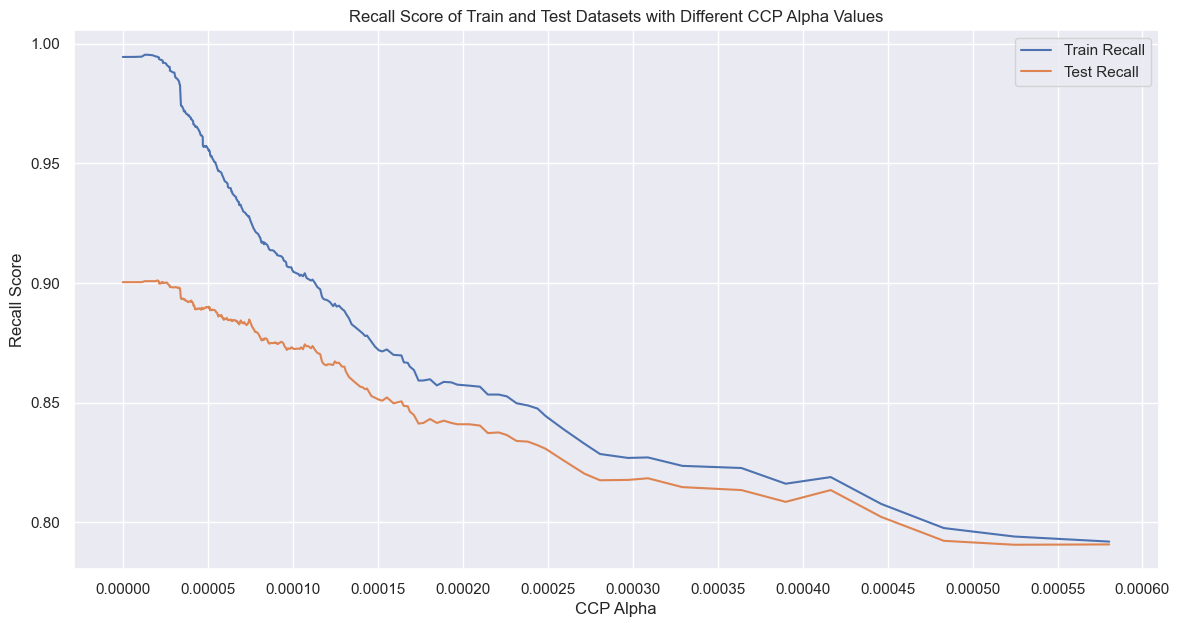

In [163]:
sns.set()
plt.figure(figsize=(14, 7))
sns.lineplot(x=alphas[0:3700:10], y= recall_train[:370], label='Train Recall')
sns.lineplot(x=alphas[0:3700:10], y= recall_test[:370], label='Test Recall')
plt.xticks(ticks=np.arange(0.00, 0.00065, 0.00005))
plt.xlabel('CCP Alpha')
plt.ylabel('Recall Score')
plt.title('Recall Score of Train and Test Datasets with Different CCP Alpha Values')
plt.show()

Looking at the lineplots of recall scores for different ccp_alpha values of a decision tree with default settings, we can see that there is initially a major discrepancy between train and test values and that it quickly merges between approximately 0 and 0.0005. Limiting to this range can give us a small enough set of values to examine more closely.

In [164]:
dt_ccp_test_pipeline = Pipeline([
    ('transform', transformer),
    ('clf', DecisionTreeClassifier(criterion='entropy', max_depth=28, ccp_alpha=0.0001125, random_state=42))
])

dt_ccp_test_pipeline.fit(X_balanced_train, y_balanced_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1211e97d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12073b550>)])),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0001125,
                                        criterion='entropy', max_depth=28,
                                        random_state=42))])

In [165]:
y_ccp_test_train_pred = dt_ccp_test_pipeline.predict(X_balanced_train)
y_ccp_test_test_pred = dt_ccp_test_pipeline.predict(X_balanced_test)

print(recall_score(y_balanced_train, y_ccp_test_train_pred))
print(recall_score(y_balanced_test, y_ccp_test_test_pred))

0.8941446063342225
0.8681258549931601
